# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
file_path= './data/NCDC/europe/greece/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/europe/greece/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, incomplete dataset

# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit
# file_path = './data/asos/topeka/hr_avg.csv' # High 0

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       20040105  2120  FM-15   40    4.6         N
1       20040105  2150  FM-15   20    3.1         N
2       20040105  2220  FM-15   20    6.2         N
3       20040105  2250  FM-15   10    4.6         N
4       20040105  2320  FM-15   40    4.6         N
5       20040105  2350  FM-15   20    5.7         N
6       20040106  0020  FM-15   10    6.7         N
7       20040106  0050  FM-15  360    7.7         N
8       20040106  0120  FM-15   20    6.2         N
9       20040106  0150  FM-15   40    1.5         N
10      20040106  0220  FM-15  999    0.5         V
11      20040106  0250  FM-15  350    3.1         N
12      20040106  0320  FM-15  350    6.2         N
13      20040106  0350  FM-15  360    5.7         N
14      20040106  0420  FM-15   10    4.6         N
15      20040106  0450  FM-15   10    4.1         N
16      20040106  0520  FM-15  350    2.1         N
17      20040106  0550  FM-15   20    2.6         N
18      20040106  0620  FM-15   30    3.1         N
19      20040106  0650  FM-15  340    3.1         N
20      20040106  0720  FM-15  360    1.5         N
21      20040106  0750  FM-15  330    2.6         N
22      20040106  0820  FM-15   10    3.6         N
23      20040106  0850  FM-15  350    3.6         N
24      20040106  0920  FM-15  360    3.1         N
25      20040106  0950  FM-15  340    3.1         N
26      20040106  1020  FM-15  360    2.1         N
27      20040106  1050  FM-15   20    4.1         N
28      20040106  1120  FM-15   10    5.7         N
29      20040106  1150  FM-15   10    5.7         N
...          ...   ...    ...  ...    ...       ...
228458  20170401  0920  FM-15   30   10.8         N
228459  20170401  0950  FM-15   30    9.3         N
228460  20170401  1020  FM-15   20    7.2         V
228461  20170401  1050  FM-15   20    8.8         N
228462  20170401  1120  FM-15   30    9.8         N
228463  20170401  1150  FM-15   40   10.3         N
228464  20170401  1220  FM-15   40   10.3         N
228465  20170401  1250  FM-15   50   10.3         N
228466  20170401  1320  FM-15   50    9.8         N
228467  20170401  1350  FM-15   40    9.8         N
228468  20170401  1420  FM-15   50    9.3         N
228469  20170401  1450  FM-15   40    9.3         N
228470  20170401  1520  FM-15   40    8.8         N
228471  20170401  1550  FM-15   40    7.7         N
228472  20170401  1620  FM-15   40    7.2         N
228473  20170401  1650  FM-15   40    5.1         N
228474  20170401  1720  FM-15   40    4.6         N
228475  20170401  1750  FM-15   50    4.1         N
228476  20170401  1820  FM-15   10    2.1         V
228477  20170401  1850  FM-15  999    0.5         V
228478  20170401  1920  FM-15  999    0.5         V
228479  20170401  1950  FM-15   30    2.6         V
228480  20170401  2020  FM-15   90    3.6         N
228481  20170401  2050  FM-15   70    4.6         N
228482  20170401  2120  FM-15   70    3.6         N
228483  20170401  2150  FM-15   10    2.1         V
228484  20170401  2220  FM-15  999    1.5         V
228485  20170401  2250  FM-15  280    2.1         N
228486  20170401  2320  FM-15  290    2.1         N
228487  20170401  2350  FM-15  999    1.0         V

[228488 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

37.936 23.944


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  2.241450e+05  224145.000000  224145.000000  224145.000000   
mean   2.010093e+07    1185.517950     316.828803       3.968813   
std    3.733195e+04     692.065593     364.151692       3.053515   
min    2.004010e+07      20.000000       0.000000       0.000000   
25%    2.007042e+07     620.000000      70.000000       1.500000   
50%    2.010071e+07    1220.000000     150.000000       3.600000   
75%    2.013101e+07    1820.000000     300.000000       6.200000   
max    2.016123e+07    2357.000000     999.000000      19.600000   

               month   dir_windrose  
count  224145.000000  224145.000000  
mean        6.513663     320.702054  
std         3.448781     369.226472  
min         1.000000       0.000000  
25%         4.000000      30.000000  
50%         7.000000     200.000000  
75%        10.000000     340.000000  
max        12.000000     999.000000

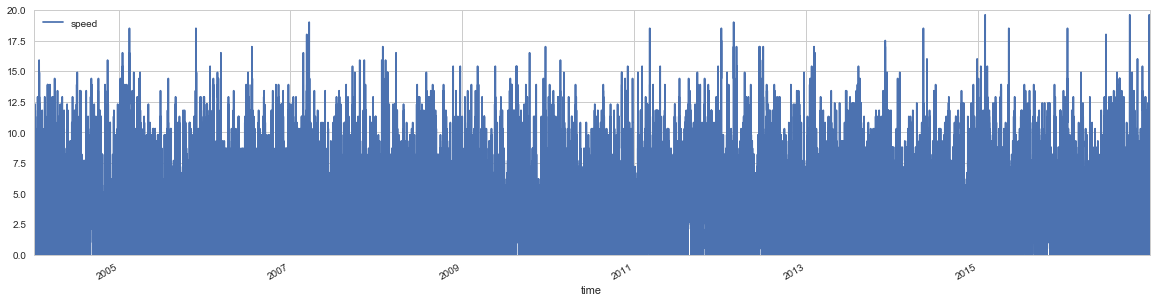

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


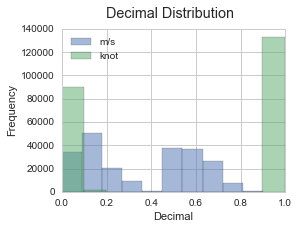

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[50, 20]


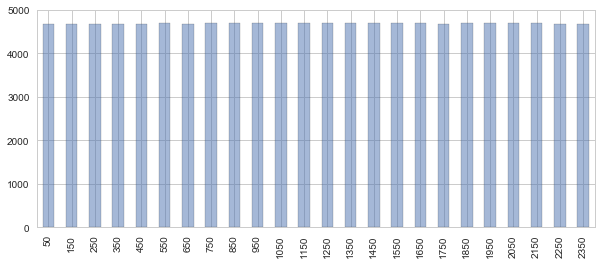

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

sudden increase in speed

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2016-12-29 13:50:00  20161229  1350  FM-15   50     38         N     12   
2016-10-07 18:50:00  20161007  1850  FM-15  150     38         V     10   
2015-05-12 12:50:00  20150512  1250  FM-15   60     36         N      5   
2012-01-06 12:50:00  20120106  1250  FM-15  260     36         N      1   
2005-02-15 05:50:00  20050215   550  FM-15  280     36         N      2   
2005-11-25 01:50:00  20051125   150  FM-15  250     36         N     11   
2012-02-27 22:50:00  20120227  2250  FM-15   70     36         N      2   
2015-01-31 22:50:00  20150131  2250  FM-15  260     35         N      1   
2016-06-28 16:50:00  20160628  1650  FM-15   90     35         N      6   
2005-02-15 04:50:00  20050215   450  FM-15  290     35         N      2   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-12-29 13:50:00            40    9.0            5.0  
2016-10-07 18:50:00           300   33.0           32.0  
2015-05-12 12:50:00            30   11.0            4.0  
2012-01-06 12:50:00           190    3.0            2.0  
2005-02-15 05:50:00           170    1.0            7.0  
2005-11-25 01:50:00           200    7.0            7.0  
2012-02-27 22:50:00            20    4.0            4.0  
2015-01-31 22:50:00           190    1.0            1.0  
2016-06-28 16:50:00             0   26.0           30.0  
2005-02-15 04:50:00           160    6.0           -1.0

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2016-12-29 13:50:00  20161229  1350  FM-15   50     38         N     12   
2005-02-15 05:50:00  20050215   550  FM-15  280     36         N      2   
2005-11-25 01:50:00  20051125   150  FM-15  250     36         N     11   
2012-01-06 12:50:00  20120106  1250  FM-15  260     36         N      1   
2015-05-12 12:50:00  20150512  1250  FM-15   60     36         N      5   
2012-02-27 22:50:00  20120227  2250  FM-15   70     36         N      2   
2011-03-08 02:50:00  20110308   250  FM-15   70     35         N      3   
2015-01-31 19:50:00  20150131  1950  FM-15  260     35         N      1   
2005-02-15 04:50:00  20050215   450  FM-15  290     35         N      2   
2015-01-31 22:50:00  20150131  2250  FM-15  260     35         N      1   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-12-29 13:50:00            40    9.0            5.0  
2005-02-15 05:50:00           170    1.0            7.0  
2005-11-25 01:50:00           200    7.0            7.0  
2012-01-06 12:50:00           190    3.0            2.0  
2015-05-12 12:50:00            30   11.0            4.0  
2012-02-27 22:50:00            20    4.0            4.0  
2011-03-08 02:50:00            20    7.0            6.0  
2015-01-31 19:50:00           190    5.0            2.0  
2005-02-15 04:50:00           160    6.0           -1.0  
2015-01-31 22:50:00           190    1.0            1.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       1538
10      1655
20      1803
30      2267
40      3209
50      4563
60      6225
70      8552
80      8675
90      6382
100     3484
110     2194
120     1602
130     1524
140     1388
150     1454
160     1863
170     2369
180     2152
190     1951
200     1735
210     1855
220     2044
230     2780
240     3375
250     3068
260     2101
270     1115
280      678
290      540
300      398
310      435
320      569
330      768
340     1023
350     1195
999    23975
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0511461979307


In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

2    6926
1    6337
0    5658
3    5054
Name: speed, dtype: int64


## 1.5 Time Shift Comparison

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

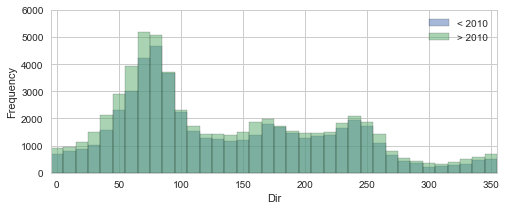

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

2004 - 2004


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


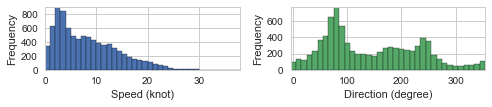

2005 - 2009


2010 - 2014


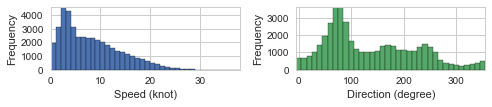

2015 - 2016


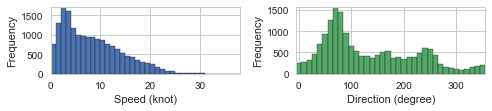

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 13.0)

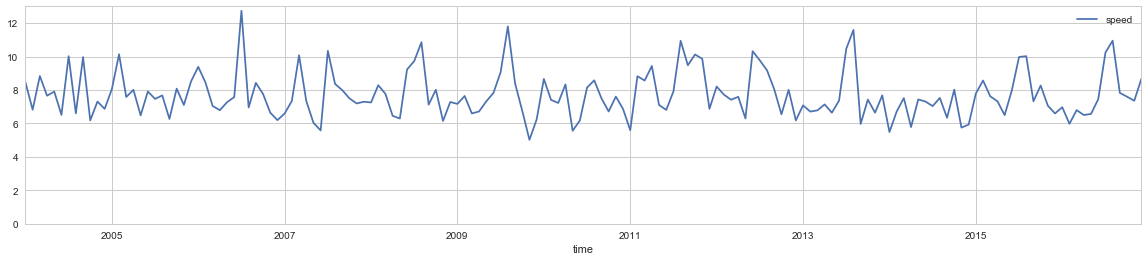

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADx5JREFUeJzt3XtsFHW/x/H3ttv7hXJtodiGogQ9PAJC6EPUEhoN/AEx
CEpJAyeB8If+gQSiUAWsUGkhIlFTASFGUiSKyEPqo0IEOSFK5Nj61IAgHgm00NJSlu1lL+zsZc4f
S4duabttYbqz7feVEJn5zex+R/rp7M785vczqaqqIoR4qCJCXYAQA5EESwgdSLCE0IEESwgdSLCE
0IEESwgdSLAMpr6+nlWrVpGdnc3TTz9NQUEBzc3NALjdbjZv3kx2djbZ2dls374dr9er7Rusvb2d
O3eSm5vbL8c0GEmwDMTr9fLqq69it9vZv38/u3bt4tKlS6xbtw6A999/n59++ok9e/awc+dOysvL
2bNnj7Z/sPY258+fZ9++ff12XIOSKgzj3Llz6oQJE9SbN29q6yoqKrR1kydPVk+cOKG1HTlyRJ05
c6bq9XrVO3fudNvexuVyqfPmzVPz8/PV2bNn98+BDUJyxjKQ9PR09u7dy8iRI7V1JpMJgNraWpxO
JzNmzNDapk+fjsVioaamhosXL3bb3qa0tJSMjAzmzp3bD0c0eEmwDGTo0KHk5OQErPvss8/IzMyk
oaGBuLg4kpKStLa2ANbX1wdtB/9HwEOHDlFYWKjzkQhzqAsQXfvkk0/44Ycf2L17N1arlZiYmID2
6OhoABRFwel0dtuuKAoFBQW88cYbAWdEoQ85YxlUaWkpO3bsYMOGDcyaNYvY2FgURQnYpm05Li4u
aPvHH39MWloaCxYs6J8DGOTkjGVA7777LmVlZRQWFrJkyRIA0tLScDgc2Gw2EhMTAWhsbAQgNTWV
qKiobtvLy8tpbGxk6tSpgP/SvMfjYerUqezdu5fp06f392EOaBIsg/nggw84cOAAxcXFAWeXiRMn
EhcXR2VlJbNmzQKgoqKCESNGkJGRwahRo7ptLysrw+PxaK9XXl7OV199RVlZGampqf17kIOABMtA
Lly4wO7du1m+fDnPPPOMdsYB/4WNRYsWsXnzZrZv346iKOzYsYNly5YBEBsb2217enp6wHsNHToU
s9lMZmZm/x3gIGJSVWM86FhZWRnqEkLu0KFDHD16tNO2bdu2kZqayv79+/nll1+IiooiJyeHvLw8
IiL8X5UVRem2vb3jx4/z7bff8uGHH+p6TAPFtGnTerW9oYLV2+JDQep8eMKhRuhbnXJVUAgdSLCE
0IEESwgdSLCE0IEESwgdSLCE0IEESwgdhEXPC5/Ph9VqDVg3dOjQTm98CmEEYREsq9XK52e/JiHZ
37nU3mIjP3shw4cPD3FlQnQu6K98n8/Hpk2bWLx4MUuXLqW6uvq+bZxOJ3l5eVy+fLnH+/RWQnIi
SSnJJKUkawETwqiCBuvEiRMoisKXX37J2rVrKSkpCWg/d+4c+fn5XLt2rcf7CDHQBQ1WZWUlzz77
LABTpkzh/PnzAe2KolBaWkpWVlaP9+ktVVVxK27cioJbUXDdcWGxWO774/P5Huh9hHhYgn7Hav/g
HEBkZCQejwez2b9rZ50Tg+3Tla56uNfX1/PHtWoShw4BoPHaDf6+9H+MSB2hbeNodTA7YyYpKSnB
DumBhUtP/HCoMxxq7IugwUpMTMRut2vLPp8vaED6sg903TW/pqaGXx3VDBk+DACP3cXI4fGkPzJG
26a1qZXJT05mxIgRnb7GwzKQe2T3t3CoEfoW/qAfBZ966ilOnz4NQFVVFRMmTAj6on3Zpze8Hi/1
llbqGu3an9qGZhwOx0N9HyH6Kuhp5Pnnn+fnn38mLy8PVVXZunUr33zzDQ6Hg8WLF/d4n4deeKQZ
c1SUthzZgzOiEP0l6E9jREQEmzdvDlg3fvz4+7YrKyvrdh8hBhPpuiCEDiRYQuhAgiWEDiRYQuhA
giWEDiRYQuhAgiWEDiRYQuhAgiWEDiRYQuhAgiWEDiRYQujAkF3CO47KZLVaMcacKEL0jCGD1XFU
ptor11CICrKXEMZhyGDBvVGZAOITE3HaXN1u7/P5qK2tDViXnp5OZGSkbjUK0RVDBqv94DEAHq87
6D625lbKKr5j1PXR/uWmZlbNyScjI0PXWoXojCGD5XA4qG1oJtntv7ZSf7OF6IS4oPslJidr42II
EUqGDBb4H7Vve/Q+wizfr0R4kcvtQuhAgiWEDiRYQuhAgiWEDiRYQujAsFcFH5TcMBahNGCD1fGG
cWtTEyuffZFHHnkEAK/Xi9VqxWQyAf4gxsfHBwRPZo0UfTVggwWBN4w9Hg8VF2ppaI0GoKb6MpWW
s6QM87ffvF7HqFFJpI1OA8DeauO/n16s+yQLYmAKGiyfz0dhYSGXLl0iOjqaoqIiMjMztfYff/yR
0tJSzGYzCxcu5OWXXwZgwYIF2lQ+Y8eOpbi4WKdD6BnV50NxKSjKHQAUlxIQvBZrMy0uHwl3e3u0
OLwyyYLos6DBaj87Y1VVFSUlJezatQsAt9tNcXExhw8fJi4ujiVLlpCbm0tSUhKqqgaM5x5qTruT
Kvf/Uhd7HYC6mzUkDksO2Kb9RAsRZjMOhyNgOiLw92MUIpigwepudsbLly+TkZHBkCH+CeGmTZvG
r7/+ypgxY3A6nSxfvhyPx8OaNWuYMmVK0GLafogdDgd6/PjGJsaTMCTJ//eE+G639SgKp85eIP3a
vWC5XE5Sk2XWSBHcA83oaLPZSEpK0toSEhKw2WzExsayYsUKXnrpJa5evcrKlSs5duxY0Mnnvvz3
GQDq665hjbfg819XoKWlGXNMFDG3b3e63JNtervccKOeOs91hvn+1t7D3tLC/Ednhs0shOFQZzjU
2BcPNKNjxza73U5SUhLjxo0jMzMTk8nEuHHjSElJobGxkdGjR3f7XpMm/cP/uvFxOO12ht29sGC/
3Yw5xtzlck+26evy6LtXEQGaLLe5c+cOEydO1NbFx8drVxaNJBxmSwyHGiEEMzqOHz+e6upqmpqa
UBSFiooKpk6dyuHDhykpKQGgoaEBm83GyJEje12c0XgUhapL9Zw88ycnz/zJd6f+g81mC3VZwoAe
eEbH9evXs2LFClRVZeHChaSmprJo0SIKCgpYsmQJJpOJrVu39mgOYqNz2p1YI64TY/Nfsm9pauIf
tSO0e2Ng3DOY6F8PPKNjbm4uubm5Ae3R0dHs2LHjIZVoLDEJcdoFEKfDHnCBw+m0k/1kRsD3TrnJ
PDiF/2kkhJx2Jxfd57DYLID/JvPfzkTS0v3fJe0tNvKzFzJ8+PBQlilCwFDBam7yX5FrbWlGjQiP
+0XtL+HHWOOIio0hNj4WALfilvteg5ShgnX25s9A5zdvw4HX46Xe0oop1v/RsOV2s/TeGKQMFaye
3rw1soDeGxERWK1WEhIStHb5zjU4GCpYA43T7uDff54grVW+cw02EiwdqSDfuQYpCZaOOn7nar5l
pXZ47X33ueTj4cAjwdJZ++9cLpfCv84fI82SprXLc18DkwSrH3k9XlpAe+YL5LmvgUqC1c/an8HA
P+KvGHjkXzXEZNCbgUmCFWIyS8rAJMEygPZjb6hw35AA0mM+/EiwDKbjkAAul5O5syYH9JgXxifB
MpiOPeblma/wJMEyoPY95js+8yVnsPAgwTI4OYOFJwlWGOjuDOZw2HjysZEBI2mBfwhtEToSrDDT
8QxWd7WG0zUwKu3eCFi2pmZmj3kyVCUKJFhhqePAo+YYc8Ck5j6fj8bGRmpqarR1ctO5f0mwBiBb
cys/3rrM1bP+Pohy07n/SbAGqPikRO0sJt2m+p8EaxC4b66w21aW/XMeY8eO1baRZ8IeLgnWING+
25S91RbwXFh

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFDRJREFUeJztnX1wlNW9xz/Jbl43CQQjodImLRm5VRglwJXpKGHkNoX2
wnRqMCQi3ilMB8c/LFNHA63RDKQEnFGnOikiHadM1GmiUgdva6kE52aMwiXRiAHEmgtBFkPeNi+7
m+TZl3P/2OQhu2yyedlkd5PfZyYze56z53l+Z7PfPef8zu+cE6WUUgiCMK1Eh9oAQZiNiPAEIQSI
8AQhBIjwBCEEiPAEIQSI8AQhBIjwIoSWlhYef/xxVq1axb333svu3bvp7u4GwOFwsGfPHlatWsWq
Vat47rnncLlcetlA+cN58cUXWbt27bTUaTYjwosAXC4Xjz32GDabjSNHjnDw4EEuXrxIUVERAC+8
8AIfffQRhw4d4sUXX+TYsWMcOnRILx8of4jGxkb+9Kc/TVu9ZjVKCHu++OILtXjxYtXa2qpfq6ur
06/dfffd6sSJE3re0aNH1Y9+9CPlcrlUf3//qPlDDAwMqA0bNqgtW7ao+++/f3oqNouRFi8CWLhw
IYcPH+bWW2/Vr0VFRQFgNpvp6+vjnnvu0fNWrlxJR0cHV65c4cKFC6PmD1FeXk5GRgbr16+fhhoJ
IrwIIDU1lZycHK9rf/7zn8nMzOT69eskJCSQnJys5w0JtKWlJWA+eLqYVVVVlJSUTHFNhCGMoTZA
GD+vvvoqH3zwAa+88goWi4W4uDiv/NjYWAA0TaOvr2/UfE3T2L17N0899ZRXiypMLdLiRRjl5eU8
//zzPP3006xZs4b4+Hg0TfN6z1A6ISEhYP4f//hHFixYwC9+8YvpqYAASIsXUfz+97+noqKCkpIS
CgsLAViwYAF2ux2r1UpSUhIAbW1tAKSnpxMTEzNq/rFjx2hrayM7OxvwTD04nU6ys7M5fPgwK1eu
nO5qzgpEeBHCH/7wB15//XXKysq8Wqcf/vCHJCQkUF9fz5o1awCoq6sjLS2NjIwM5s+fP2p+RUUF
TqdTv9+xY8d46623qKioID09fXorOYsQ4UUA58+f55VXXmHbtm3cd999eosFHsfLpk2b2LNnD889
9xyapvH888/zyCOPABAfHz9q/sKFC72elZqaitFoJDMzc/oqOAuJUip8F8LW19eH2oSwoKqqinff
fddv3oEDB0hPT+fIkSOcOnWKmJgYcnJyKCgoIDraM4TXNG3U/OEcP36cv/3tb7z00ktTWqeZwooV
KyZWMNBEn8vlUsXFxSo/P189/PDD6vLly1751dXV6oEHHlD5+fmqsrLSK6+hoUE9/PDDevry5cuq
oKBAFRYWqmeeecZrAtcfdXV1Y5+RDCFiZ3CZDXYG9GqeOHECTdOorKzkiSeeYP/+/Xqew+GgrKyM
1157jYqKCiorK2lvbwfg8OHDPP300wwMDOjvLysrY+fOnbz55psopaiurp7Yr4UgRDgBx3j19fWs
Xr0agGXLltHY2KjnNTU1kZGRwZw5cwBPs3vmzBl++tOfkpGRwcsvv8xTTz2lv//cuXN6BEVOTg61
tbXk5uYGfH4kIHYGl0ixc6IEFN5wNzSAwWDA6XRiNBqxWq1eEREmkwmr1QrAunXruHr1qte9lFJ6
qJPJZKK3tzeggRPuQ08j9fX1YmcQiSQ7J0rArmZSUhI2m01Pu91ujEaj3zybzeYlxJseNmwwb7PZ
SElJmZDRghDpBBTe8uXLqampAaChoYHFixfreVlZWTQ3N9PV1YWmadTV1ekTsf648847OX36NAA1
NTUyOSvMWgJ2NXNzc6mtraWgoAClFPv27eO9997DbrezefNmdu3axfbt21FKkZeXN+qka1FREcXF
xbzwwgssWrSIdevWBbUyghAphP08XqT09cXO4DEb7JTIlQC43W4sFovXtdTUVL+Tz4IwVkR4AbBY
LLxx+h1MKR7Prq3HypZVedxyyy0htkyIZER4Y8CUkkTyXPHACsFD+kuCEAKkxQuAUgqH5sAxuHjU
oTkIY3+UECGI8AJgt9sxX+8mxeHpHPR0dmO320NslRDpiPB8UEp5CctutxNtNGKMiQHAYJSPTJg8
8i3ywW6389Gnl4iPTwTgSvM3uEfYdVkQJooIzw/x8YkkJHqEFxeXAM4ABQRhnIhXUxBCgAhPEEKA
dDV9cLvddHdZ0LR+AHp7ulHRMn0gBBcRng8Wi4Xaqx+SPNezqv5a6xWS5knUihBcRHh+SEhKxDTH
s6A33pQYYmuEmYiM8QQhBIjwBCEEiPAEIQSI8AQhBIjwBCEEiPAEIQTIdMI4UXgCqYfvJyrr84Tx
IsIbJy6nk7rzZq73eo4z7u+3Y4rqD7FVQqQhwhsnyu1GG9D0kLKB/gES4twhtkqINER446TP1keD
43+5Fu85F6K3q5uc+XeE2Coh0pj1wvO34jzQiC1+WEiZ0+mYQuuEmcqsF56sOBdCwawXHsiKc2H6
kXk8QQgBIjxBCAEiPEEIASI8QQgBAZ0rbrebkpISLl68SGxsLKWlpWRmZur5J0+epLy8HKPRSF5e
Hvn5+SOWOX/+PDt27OD73/8+AIWFhfzsZz+bssoJQrgSUHgnTpxA0zQqKytpaGhg//79HDx4EACH
w0FZWRlvv/02CQkJFBYWsnbtWj799FO/Zc6dO8cvf/lLtm3bNuUVE4RwJqDw6uvrWb16NQDLli2j
sbFRz2tqaiIjI4M5czwbA61YsYIzZ87Q0NDgt0xjYyOXLl2iurqazMxMfvvb35KUlBT0So0H2VVM
CAUBhWe1Wr3EYTAYcDqdGI1GrFYrycnJep7JZMJqtY5Y5q677uLBBx9k6dKlHDx4kPLycoqKikZ9
fn19/UTqNWZaWlr4+9efYErx7CTW+s01TKnJRMV4Ppqenm6McTHEdXb6Tfd2d0Fi5pTbGSzEzvAg
oPCSkpK8lsC43W6Mgwd3+ObZbDaSk5NHLJObm0vK4Bc8NzeXvXv3BjRwqs/CvnLlCmfszcy5ZR4A
yuHCGGdk3jxP2tbZPWraoKbHzmAwG84Wn04m8+MQ0Ku5fPlyampqAGhoaGDx4sV6XlZWFs3NzXR1
daFpGnV1dWRnZ49YZvv27Zw9exaATz75hCVLlkzY8ImglMJms3n9jSU2U/Dgdrvp6Ojw+nO7ZWXG
RAjY4uXm5lJbW0tBQQFKKfbt28d7772H3W5n8+bN7Nq1i+3bt6OUIi8vj/T0dL9lAEpKSti7dy8x
MTGkpaWNqcULJr5xmSCxmeNBzoMPHgGFFx0dzZ49e7yuZWVl6a/Xrl3L2rVrA5YBWLJkCX/5y18m
auukcbvdDPQPEB19o6HXBjRxpowDOQ8+OMyqIGnf7dlBtmifDG63m85BJ9MQqampXj9sgn9mlfDA
e3t2mPwW7Qro7+/3ciYlJiYSFRU1qftGAvZeG39te59b0tMA6XqOh1knvGDj1DQamluISfkSgIGB
PtavudtrmmUmY0oxSddzAojwJkmfrQ9L9FXirJ7Nj3q7ulllyZg1whMmhggvCMSZEmQrCGFciPCE
MaOUwqE5cGgaAA7NiSFWvkITQT61CMV3kyYIvlPH7XZjsVj0tNls5mpLF3McHq9lS1sP340zBO15
s4kZLbyJ7CAWKfgGA9jtVpb8YC4mk0l/z2Rd+74T5uZL3+AiBmNMDAAGo4huosxo4c3kHcR8gwE6
2tt4y1LD3DRPDGlvVw//+W//oceUDpUZL8MnzBOTkuizDuh5CnA4nMO6ng7Zzn6MzGjhwczdQcw3
GOD6NTPfy0gjPjHek99m4ejZ90kbnGPr7eohQ5vPokWL9HsEahF9x3ROl7fjyOV00dLRS1S8Zw6z
p7P7pu6v4J8

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGKxJREFUeJzt3X9M1Pf9B/DnHXAU74eObiZm9DqwXqIjVwGnNkWcyVa6
RVtn6sU7c93ij1jmdLCpR1VAAyslFuKwo5YNs+QQ2KU269JtaadzXP1R1nxaNKLM7L6G1h+1iK69
zykcHu/vHy03GYfyOTk+Bz4fSRN4f96fu9fnHfvk83l/fmmEEAJERDRqWrULICKaaBicREQKMTiJ
iBRicBIRKcTgJCJSiMFJRKTQqILz1KlTcDqdAIBz587B4XDA6XRi7dq1uHbtGgDA4/FgxYoVsNls
OHr0KACgt7cXmzZtgsPhwPr163H9+nUAQHt7O1auXIlVq1bh1VdfjcV2ERHFjriH+vp6sXTpUrFy
5UohhBCrV68WZ8+eFUII0dzcLF566SXx2WefiaVLl4q+vj7xxRdfhH8+cOCAqK2tFUII8fbbb4vy
8nIhhBDPPPOM6OrqEgMDA2LdunWio6PjXmUQEcWNe+5xms1m7Nu3L/x7TU0NZs+eDQAIhUJITk7G
6dOnkZWVBZ1OB6PRCLPZjM7OTkiShEWLFgEA8vLycPLkSciyjGAwCLPZDI1Gg9zcXJw4cSJGfxaI
iMZe4r065Ofn4+LFi+Hfp0+fDgD48MMP0djYiIMHD+K9996D0WgM99Hr9ZBlGbIsh9v1ej38fj9k
WYbBYBjS95NPPrlnoZIkjX6riIgUyMnJUdT/nsEZyV/+8he89tprqK+vR2pqKgwGAwKBQHh5IBCA
0Wgc0h4IBGAymSL2NZlMo/pepRsXK5IksZYIWEtkrCV+6wCi2ylTfFb9rbfeQmNjI9xuNx555BEA
gNVqhSRJ6Ovrg9/vh8/ng8ViQXZ2NlpbWwEAXq8XOTk5MBgMSEpKwscffwwhBI4dO4Z58+YpLpyI
SC2K9jhDoRB+9atfYcaMGdi0aRMA4Dvf+Q42b94Mp9MJh8MBIQSKioqQnJwMu90Ol8sFu92OpKQk
VFdXAwB2796NLVu2IBQKITc3F48//vjYbxkRUYyMKjjT0tLg8XgAAP/85z8j9rHZbLDZbEPaUlJS
UFtbO6zv3Llzw59HRDTR8AJ4IiKFGJxERAoxOImIFGJwEhEpFNV1nBNFKBSCz+cbcfnMmTORkJAw
jhUR0WQwqYPT5/PB+WITpkydPmzZzc8/g7vSAYvFokJlRDSRTergBIApU6fD8LVvql0GEU0inOMk
IlJo0u9xjkQMDODChQsjLuf8JxGN5IENzlv+bpTWX8OUqcNPHnH+k4ju5oENToDzn0QUHc5xEhEp
xOAkIlKIwUlEpBCDk4hIIQYnEZFCDE4iIoUYnERECjE4iYgUGlVwnjp1Ck6nEwDQ1dUFu90Oh8OB
srIyDAwMAAA8Hg9WrFgBm82Go0ePAgB6e3uxadMmOBwOrF+/HtevXwcAtLe3Y+XKlVi1ahVeffXV
WGwXEVHM3DM4f/vb32Lnzp3o6+sDAFRWVqKwsBBNTU0QQuDIkSPo7u6G2+1GS0sLGhoaUFNTg2Aw
iObmZlgsFjQ1NWH58uWoq6sDAJSVlaG6uhrNzc04deoUzp49G9utJCIaQ/cMTrPZjH379oV/7+jo
wPz58wEAeXl5OHHiBE6fPo2srCzodDoYjUaYzWZ0dnZCkiQsWrQo3PfkyZOQZRnBYBBmsxkajQa5
ubk4ceJEjDaPiGjs3fNe9fz8fFy8eDH8uxACGo0GAKDX6+H3+yHLMoxGY7iPXq+HLMtD2u/sazAY
hvT95JNPRlWsJEmj26qvdHV1Kep/pzNnzsDv949ZLbHEWiJjLZHFSy3xUkc0FD/kQ6v9705qIBCA
yWSCwWBAIBAY0m40Goe0362vyWQa1Xfn5OQoqtVoNAJvf6ponUGZmZkjPh1JkiTFtcQKa4mMtUQW
L7XESx1AdAGu+Kz6nDlz0NbWBgDwer2YN28erFYrJElCX18f/H4/fD4fLBYLsrOz0draGu6bk5MD
g8GApKQkfPzxxxBC4NixY5g3b57iwomI1KJ4j9PlcqGkpAQ1NTXIyMhAfn4+EhIS4HQ64XA4IIRA
UVERkpOTYbfb4XK5YLfbkZSUhOrqagDA7t27sWXLFoRCIeTm5uLxxx8f8w0jIoqVUQVnWloaPB4P
ACA9PR2NjY3D+thsNthstiFtKSkpqK2tHdZ37ty54c8jIppoeAE8EZFCDE4iIoUYnERECjE4iYgU
YnASESnE4CQiUojBSUSkEIOTiEghBicRkUIMTiIihRicREQKMTiJiBRicBIRKcTgJCJSiMFJRKQQ
g5OISCEGJxGRQgxOIiKFGJxERAoxOImIFFL8lksA6O/vR3FxMS5dugStVovy8nIkJiaiuLgYGo0G
s2bNQllZGbRaLTweD1paWpCYmIiCggIsWbIEvb292Lp1K3p6eqDX61FVVYXU1NSx3jYiopiIao+z
tbUVt2/fRktLCzZu3Ii9e/eisrIShYWFaGpqghACR44cQXd3N9xuN1paWtDQ0ICamhoEg0E0NzfD
YrGgqakJy5cvR11d3VhvFxFRzES1x5meno5QKISBgQHIsozExES0t7dj/vz5AIC8vDwcP34cWq0W
WVlZ0Ol00Ol0MJvN6OzshCRJWLduXbjvaINTkiRFdXZ1dSnbsK+IgQG8++67OHPmTMTlaWlpimuJ
JdYSGWuJLF5qiZc6ohFVcE6ZMgWXLl3CD37wA9y4cQP79+/HBx98AI1GAwDQ6/Xw+/2QZRlGozG8
nl6vhyzLQ9oH+45GTk6OojqNRiPw9qeK1gGAW/5uuI9qMGXq8B3ym59/BtdqYMWKFYo/NxYkSVI8
LrHCWiJjLfFbBxBdgEcVnL///e+Rm5uLX/7yl7hy5Qp+/OMfo7+/P7w8EAjAZDLBYDAgEAgMaTca
jUPaB/tGKxQKwefzRVx24cKFqD93ytTpMHztm1GvT0STV1TBaTKZkJSUBACYOnUqbt++jTlz5qCt
rQ0LFiyA1+vFwoULYbVasXfvXvT19SEYDMLn88FisSA7Oxutra2wWq3wer339ZfH5/PB+WITpkyd
PmxZz8VzeDhtdtSfTUQUSVTB+ZOf/ATbt2+Hw+FAf38/ioqKkJmZiZKSEtTU1CAjIwP5+flISEiA
0+mEw+GAEAJFRUVITk6G3W6Hy+WC3W5HUlISqqur72sjRto7vPn51fv6XCKiSKIKTr1ej1//+tfD
2hsbG4e12Ww22Gy2IW0pKSmora2N5quJiFTHC+CJiBRicBIRKcTgJCJSiMFJRKQQg5OISCEGJxGR
QgxOIiKFGJxERAoxOImIFGJwEhEpxOAkIlKIwUlEpBCDk4hIIQYnEZFCDE4iIoWieh7ng0wMDODy
5cs4f/58xOUzZ85EQkLCOFdFROOJwanQ4IvcDn14eNiym59/BnelAxaLRYXKiGi8MDijMNKrOsTA
wF1fEMe9UaLJgcE5hm75u1Fafw1Tpg5/62bgP5+ifMOTSE9Pj7guQ5Vo4og6OF9//XX8/e9/R39/
P+x2O+bPn4/i4mJoNBrMmjULZWVl0Gq18Hg8aGlpQWJiIgoKCrBkyRL09vZi69at6OnpgV6vR1VV
FVJTU8dyu1RztxfHldafjBiqPMQnmliiCs62tjZ89NFHaG5uxq1bt3DgwAFUVlaisLAQCxYsQGlp
KY4cOYK5c+fC7Xbj0KFD6Ovrg8PhwJNPPonm5mZYLBZs2rQJf/7zn1FXV4edO3eO9bbFHR7iE00O
UQXnsWPHYLFYsHHjRsiyjG3btsHj8WD+/PkAgLy8PBw/fhxarRZZWVnQ6XTQ6XQwm83o7OyEJElY
t25duG9dXd2

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF25JREFUeJzt3X1sU9f9BvDHduI02A40nZCqsWwJxVpZ5JEXQSsgNNLW
dFMZDLUWdmU2URBkHV2yQh0gL6BEYxFLxNItokyZJjkkqVWqaVo1dWvGkpXQqLoroASyalbkDcJr
oNQ2xE6c+/tji39147yd2L528nz+Ss69yf3eAzzce+49xypZlmUQEdGcqZUugIgoWTFAiYgEMUCJ
iAQxQImIBDFAiYgEMUCJiATNKkAvXrwIm80GAHC73bBYLLBaraipqcH4+DgAwOl0Ytu2bTCbzTh7
9iwAYGRkBPv27YPVasXu3btx9+5dAMCFCxfw4osvYvv27fjVr34Vi/MiIoq5GQP0N7/5DSorK+H3
+wEAx44dQ1lZGdra2iDLMjo7O3H79m04HA50dHSgpaUFjY2NCAQCaG9vh9FoRFtbG7Zu3Yrm5mYA
QE1NDRoaGtDe3o6LFy/i8uXLsT1LIqIYmDFAs7Ky8MYbb4S+7+/vx9q1awEARUVF6OnpwaVLl5CX
lwetVguDwYCsrCwMDAxAkiRs3LgxtO/58+fh9XoRCASQlZUFlUqFDRs2oKenJ0anR0QUOykz7VBS
UoKrV6+GvpdlGSqVCgCg0+ng8Xjg9XphMBhC++h0Oni93rD2z++r1+vD9v3Pf/4zY6GSJM3+rIiI
5qCgoEDo52YM0C9Sq///otXn8yEjIwN6vR4+ny+s3WAwhLVPt29GRsasji16ktEmSRJriYC1RMZa
ErcOYH4XZ3N+Cr969Wr09vYCALq7u1FYWAiTyQRJkuD3++HxeOByuWA0GpGfn4+urq7QvgUFBdDr
9UhNTcW///1vyLKMDz74AIWFhcInQESklDlfgdrtdlRVVaGxsRE5OTkoKSmBRqOBzWaD1WqFLMso
Ly9HWloaLBYL7HY7LBYLUlNT0dDQAAA4evQo9u/fj2AwiA0bNuCb3/xm1E8smQSDQbhcrim3r1y5
EhqNJo4VEdFszCpAV6xYAafTCQDIzs5Ga2vrpH3MZjPMZnNYW3p6Opqamibtu2bNmtDvI8DlcsF2
sA1Lli6ftO3B/VtwHLPCaDQqUBkRTWfOV6AUG0uWLof+0S8rXQYRzQFnIhERCWKAEhEJYoASEQni
GGicTPekfXBwMM7VEFE0MEDjZLon7cNXr+CxFU8qUBURzQcDNI6metL+4P5NBaohovniGCgRkSAG
KBGRIAYoEZEgBigRkSAGKBGRIAYoEZEgBigRkSAGKBGRIAYoEZEgBigRkSAGKBGRIAYoEZEgBigR
kSAGKBGRIAYoEZEgBigRkSAGKBGRIAYoEZEgoY/0GB0dRUVFBa5duwa1Wo3a2lqkpKSgoqICKpUK
q1atQk1NDdRqNZxOJzo6OpCSkoLS0lIUFxdjZGQEBw4cwPDwMHQ6Herr65GZmRntcyMiiimhK9Cu
ri6MjY2ho6MDr7zyCk6cOIFjx46hrKwMbW1tkGUZnZ2duH37NhwOBzo6OtDS0oLGxkYEAgG0t7fD
aDSira0NW7duRXNzc7TPi4go5oSuQLOzsxEMBjE+Pg6v14uUlBRcuHABa9euBQAUFRXh3LlzUKvV
yMvLg1arhVarRVZWFgYGBiBJEnbt2hXad7YBKkmSSLkxMdda3G638LH6+vrg8XiiVksssZbIWMtk
iVLHfAgF6JIlS3Dt2jV85zvfwb1793Dy5El89NFHUKlUAACdTgePxwOv1wuDwRD6OZ1OB6/XG9Y+
se9sFBQUiJQbdZIkzbkWg8EA/PGG0PFyc3NhNBqjVkussJbIWEvi1gHML8iFAvR3v/sdNmzYgNde
ew3Xr1/HD37wA4yOjoa2+3w+ZGRkQK/Xw+fzhbUbDIaw9ol9iYiSjdAYaEZGRugKcunSpRgbG8Pq
1avR29sLAOju7kZhYSFMJhMkSYLf74fH44HL5YLRaER+fj66urpC+ybK/0RERHMhdAX6wx/+EIcO
HYLVasXo6CjKy8uRm5uLqqoqNDY2IicnByUlJdBoNLDZbLBarZBlGeXl5UhLS4PFYoHdbofFYkFq
aioaGhqifV5ERDEnFKA6nQ6//OUvJ7W3trZOajObzTCbzWFt6enpaGpqEjk0EVHC4Iv0RESCGKBE
RIIYoEREgoTGQCl+5PFxDA4OTrk9GAzGsRoi+jwGaIJ76LmN6lN3sGSpa9K2B/dvwf6SKTQDjIji
iwGaBJYsXQ79o19Wugwi+gKOgRIRCWKAEhEJYoASEQligBIRCWKAEhEJ4lP4KAoGg3C5Jr9uBGDa
dzmJKDkxQKPI5XLBdrANS5Yun7Rt+OoVPLbiSQWqIqJYYYBG2VTvbD64f1OBaogoljgGSkQkiAFK
RCSIAUpEJIgBSkQkiAFKRCSIAUpEJIgBSkQkiAFKRCSIAUpEJIgBSkQkSHgq55tvvom//vWvGB0d
hcViwdq1a1FRUQGVSoVVq1ahpqYGarUaTqcTHR0dSElJQWlpKYqLizEyMoIDBw5geHgYOp0O9fX1
yMzMjOZ5ERHFnNAVaG9vLz7++GO0t7fD4XDgxo0bOHbsGMrKytDW1gZZltHZ2Ynbt2/D4XCgo6MD
LS0taGxsRCAQQHt7O4xGI9ra2rB161Y0NzdH+7yIiGJOKEA/+OADGI1GvPLKK9i7dy+eeeYZ9Pf3
hz4dsqioCD09Pbh06RLy8vKg1WphMBiQlZWFgYEBSJKEjRs3hvY9f/589M6IiChOhG7h7927h6Gh
IZw8eRJXr15FaWkpZFmGSqUCAOh0Ong8Hni9XhgMhtDP6XQ6eL3esPaJfWdDkiSRcmMiUi1ut1uB
ShK/X5TCWiJLlFoSpY75EArQZcuWIScnB1qtFjk5OUhLS8ONGzdC230+HzIyMqDX6+Hz+cLaDQZD
WPvEvrNRUFAgUm7USZIUsRaDwQD88UaEn4itRO8XJbCWyBKllkSpA5hfkAvdwhcUFODvf/87ZFnG
zZs38fDhQzz99NPo7e0FAHR3d6OwsBAmkwmSJMHv98Pj8cDlcsFoNCI/Px9dXV2hfROlI4mI5kLo
CrS4uBgfffQRXnjhBciyjOrqaqxYsQJVVVVobGxETk4OSkpKoNFoYLPZYLVaIcsyysvLkZaWBovF
ArvdDovFgtTUVDQ0NET7vIiIYk74NabXX399Ultra+ukNrPZDLPZHNaWnp6OpqYm0UMTESUEvkhP
RCSIAUpEJIgBSkQkiAFKRCSIAUpEJIgBSkQkiAFKRCRI+D3QxSoYDMLtdofN8Z8wODioQEVEpBQG
6By5XC7Un76EJUsnz3kfvnoFj614UoGqiEgJDFABS5Yuh/7RL09qf3D/pgLVEJFSOAZKRCSIAUpE
JIgBSkQkiAFKRCSIAUpEJIgBSkQkiAFKRCSI74EmMXl8HENDQ/jkk08ibl+5ciU0Gk2cqyJaPBig
Seyh5zYcZ1U484/3J217cP8WHMesMBqNClRGtDgwQJPcVLOiiCj2OAZKRCSIAUpEJIgBSkQkiAFK
RCSIAUpEJGheATo8PIxNmzbB5XLB7XbDYrHAarWipqYG4+PjAACn04lt27bBbDbj7NmzAICRkRHs
27cPVqsVu3fvxt27d+d/JkREcSb8GtPo6Ciqq6vxyCOPAACOHTuGsrIyrFu3DtXV1ejs7MSaNWvg
cDhw5swZ+P1+WK1WrF+/Hu3t7TAajdi3bx/effddNDc3o7KyMmonRRRPwWAQLpdr2u20MAkHaH19
PbZv345Tp04BAPr7+7F27VoAQFFREc6dOwe1Wo28vDxotVpotVpkZWVhYGAAkiRh165doX2bm5uj
cCpEynC5XLA

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

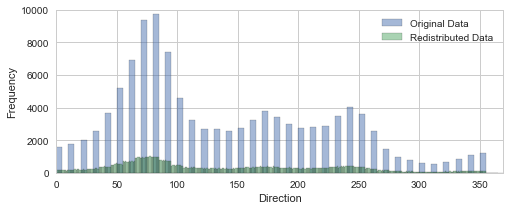

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

Redistribute upward, e.g. 0 -> [0,1]


## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-15
Sampling time used: [50, 20]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.323000e+04  43230.000000  43230.000000  43230.000000  43230.000000   
mean   2.012064e+07   1200.828129    136.418925      8.132893      6.512121   
std    1.412040e+04    691.691276     85.171012      5.882961      3.449215   
min    2.010010e+07     50.000000     -4.980118      0.000690      1.000000   
25%    2.011040e+07    650.000000     69.356466      3.254673      4.000000   
50%    2.012063e+07   1250.000000    111.155379      6.867989      7.000000   
75%    2.013093e+07   1850.000000    202.879445     11.886294     10.000000   
max    2.014123e+07   2350.000000    354.981581     36.429587     12.000000   

       dir_windrose             x             y  
count  43230.000000  43230.000000  43230.000000  
mean     318.252533      0.719066      3.216220  
std      367.745908      5.280566      7.874577  
min        0.000000    -27.543315    -35.564131  
25%       30.000000     -2.521059     -0.918351  
50%      200.000000     -0.109076      1.885572  
75%      340.000000      4.032719      8.373779  
max      999.000000     26.151351     34.042676

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

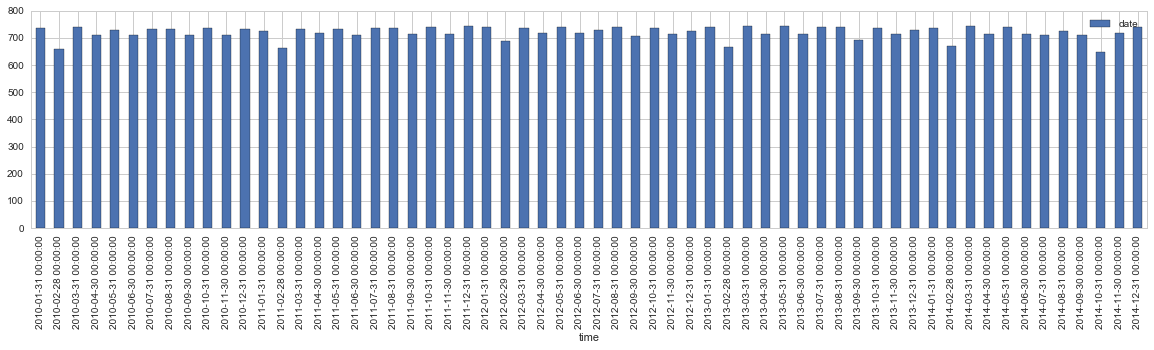

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


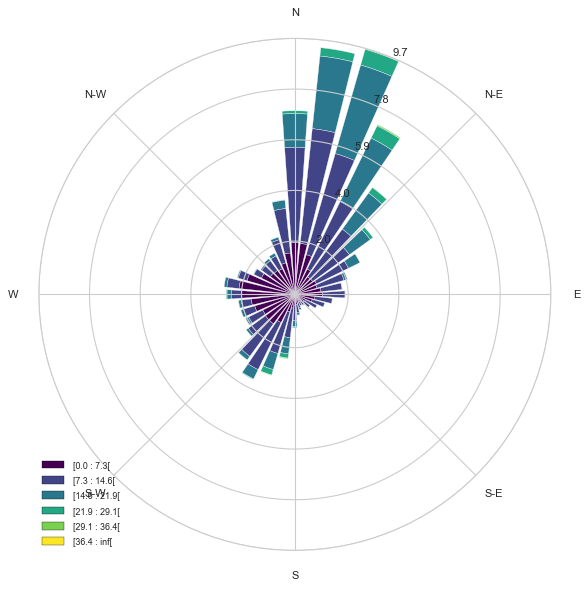

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVXX+x/HXZUcWWQQUTQ3N3MbcUnPBn9iizM80QXHD
SnPSXHIJV1wmaVxLy9IwMUeUStGKGs1MSxv9aaLS4j4uTAKyI1xAFu/9/WHcQAHhwl04fJ6Px32M
nHvOPd8vMe97lu/5flRarVaLEEIYmIWpGyCEqB8kbIQQRiFhI4QwCgkbIYRRSNgIIYxCwkYIYRQG
CxuNRsOSJUsICgoiODiY+Pj4B9bJz89n1KhRXL16FYCioiJCQkIYM2YMgYGBHDp0yFDNE0IYmcHC
5rvvvqOwsJDPPvuMOXPmsHLlyjLv//rrr4wdO5bff/9dtywmJgYXFxeioqLYsmULy5cvN1TzhBBG
ZrCwOX36NP369QOgc+fO/Pbbb2XeLyws5IMPPsDHx0e3bNCgQbz++usAaLVaLC0tDdU8IYSRWRnq
g9VqNY6OjrqfLS0tKS4uxsrq3i67dev2wDYODg66bWfMmMHMmTMfup/Tp0/XUouFENVV3v+PK2Kw
sHF0dCQ3N1f3s0aj0QVNZZKSkpg6dSpjxoxhyJAhVdpXdTpc15w+fVqx/VNy36B+9K86DHYa1bVr
V44ePQpAXFwcbdq0eeg2aWlpTJgwgZCQEAIDAw3VNCGECRjsyOaZZ57h2LFjjBo1Cq1Wyz/+8Q++
+uor8vLyCAoKKnebDz/8kOzsbDZu3MjGjRsB+Oijj7CzszNUM4UQRmKwsLGwsODNN98ss6xVq1YP
rBcZGan7d2hoKKGhoYZqkhDChGRQnxDCKCRshBBGIWEjhDAKCRshhFFI2AghjELCRggz8+KLL/LL
L78A9x7r6datG1u2bNG9HxwczIULFx7Y7ujRo3z22WfcvHmTkSNHVnl/ffr00X1uyUPRhmCwW99C
KEFISAi7d+/Wa9vCwkJsbGweWD5ixAjWrFlT4XZ9+vQhNjaWTp06cfr0afr27cuRI0d45ZVXKCgo
ICEhgbZt2z6wna+vLwA3b97Uq72GJkc2QpiZ3r17ExsbC8CRI0cYMWIEOTk55OTkcPbsWXr06MGp
U6cYPXo048aNY8GCBRQVFbF3717Wrl0LQEZGBpMnT2bEiBF88MEHAMyfP183qv/o0aPMnz/fqP2S
IxshKrFmzZpKj0Iqo++zUe3bt+fatWtotVpOnTrF7Nmzeeqppzh+/DiXLl2ib9++LF68mKioKNzd
3Vm/fj2ff/55mWcP8/LyWLNmDQ0aNGDs2LEMHDhQrz7UJjmyEcLMWFhY0LZtW44ePYqHhwc2Njb4
+vpy5swZTp8+zVNPPUVKSgozZ84kODiYY8eOkZCQUOYz2rZti5OTE5aWlvzlL3/h+vXrZd43Rbk4
CRshzFCfPn0IDw/XzQnVrVs3zp8/j0ajwdXVlcaNG7Nx40YiIyOZPHkyvXr1KrP91atXyc3Npbi4
mF9++YXHHnsMGxsbUlNTATh//rzR+yRhI4QZ6t27N6dPn6Z///4A2NjY4OTkRI8ePbCwsGDRokX8
7W9/Y9SoUURFRT0wq0LDhg2ZNWsWo0aN4rnnnqN169aMGDGCbdu28dJLL5GcnGz0Pqnqevndqp4X
azQaMjMzy33P1dUVCwvzzF0lz4mi5L6B9O9+9eYCcWZmJv+MicXB0bnM8lx1Ni8+3x13d3cTtUyI
+qHehA2Ag6MzTs6upm6GEPWSeZ47CCEUR8JGCGEU9eo0SojqquzGwsNkZWWRnp7+wHJzviFhSBI2
QlSiohsLVXHrVjb/ybhcZll9viFhsLDRaDQsW7aMS5cuYWNjQ1hYGC1atCizTn5+Pi+//DJvvfUW
rVq1qtI2QhibvjcWctT5et+QOHnyJDNnzqR169ZotVqKi4sZP348/v7+5a6fmJjIxYsX8fPz02t/
xmBW5Xcfto0Q9UmvXr2IjIxkx44dREREsGXLlnKnlgA4ceIEZ86cMXILq8dgRzZVLb87d+7cKm8j
RH3l4OBAUFAQ+/btY8eOHdy6dYuUlBT8/PyYMWMGmzdv5s6dO3Tp0gUnJyfef/99tFotubm5vP32
2zz66KOm7oJ5ld992DYVqUplvqysLG7dyiZHnV9meU52JkeOJNGwYcMyy52dnc3mIp6SSwybe98q
+rupqsTExDI/56pvExeXh4uLS6XbXb58mYyMjDK/n6ysLE6cOEHPnj0ZPnw4hYWFTJs2DV9fX559
9lkSExNxcXHh4MGDjB8/HldXV7744gu2bt3KsGHD9Gp/bTKr8rv6luytypDp9PR0/pNx+YFz6CRt
IRdvFeB+t4Fu2b2LeD5mcRFPyUPe60LfKvq7qYrExES8vb3LLMvJtqdz5zYP/dsqLi7mzJkzZX4/
586do3///qSkpBAVFYWjoyMajYZu3boRHx+v+3dmZiYxMTE0aNCA5ORkunbtapDfc3W/KAwWNl27
duX777/H39+/yuV39dmmNjRwdJKRxaJCuepsPbe7TU62fa18llqtZvfu3QQGBpKfn8+bb75JfHw8
u3btQqvVYmFhgUajAWDx4sUcPHgQR0dH5s2bZ5LpJMpjVuV3y9tGCFNydXXlxee767VtXFwenTs/
+IXp6lq1L7YTJ04QHByMhYUFd+/eZfr06Tz66KPMmTOHuLg4bGxsaNGiBSkpKbRp04ZNmzbRoUMH
nn/+ecaOHYu9vT2NGjUiJSVFr/bXtnrz1Hd6ejrRh8s5jUq4gaWVDZ5efx7u5mRnEuj38ENdY6gL
pxr6UnLfQPp3P/O4AiqEUDwJGyGEUUjYCCGMQsJGCGEUEjZCCKOQsBFCGIWEjRDCKCRshBBGIWEj
hDAKCRshhFFI2AghjELCRghhFBI2QgijkLARQhiFhI0QwigkbIQQRiFhI4QwCgkbIYRRSPndUgru
5PP17ghuXL1Avw4bzGJaUCGUQsIG0Gq1nDz6DTs/Wk16ahIAgwYN4ptvvqF9+/Ymbp0QymCyWt+H
Dx/mgw8+wMrKioCAAEaOHElRURHz588nISEBCwsLli9fTqtWrQzVRACSbt7gy0/D+c+FOKysrRky
chJarYavd0fQu3dvPv/8cwYMGGDQNghRHxgsbErX7Y6Li2PlypVs2rQJgKKiIlasWEF0dDT29vaM
Hj0aPz8/4uLiKC4u5tNPP+XYsWOsX7+eDRs2GKR9ueps9kS+z8GvdqLRaOjcoz/Br86ncdOW5GRn
4j+gG6+//jrPPfccERERBAcHG6QdQtQXJqn1ffXqVZo3b64redutWzdOnTpFmzZtuHv3LhqNBrVa
XaVqmCX7epiSMqq3s3M59e/97I+OIFd9Gxd3L555fjw9+g1Cw70qhrnq2/Rt34YNGzYQEhLC+PHj
OXbsGK+88goqlar6v4waMvcStTWh5L6B8vtXHSap9a1Wq3FyctK95+DggFqtpkGDBiQkJDB48GAy
MzP58MMPq7SvqtaN+vbEXrZvWMK1K79ha9eAURNm07lHf2ztHe+rG3WvROrAgQPx9fXF39+f8PBw
CgoKCA8Px8bGphq/iZpRcu0hJfcN6kf/qsNgt74rq9t9/3u5ubk4OTmxbds2+vbty4EDB/jyyy+Z
P38+BQUFNW5LYWEh06dPZ3Xo37h25Tf6DBjC2i37GDJyElbWlQdHu3btOHHiBN27d2fbtm34+/uT
lZVV4zYJUd8YLGy6du3K0aNHAR6o292qVSvi4+PJysqisLCQ2NhYunTpgrOzs+6Ip2HDhhQXF3P3
7t0at2X37t188sknNG3RmiVrd/DavNW4NfKq8vZeXl788MMPDB06lEOHDtG3b1/i4+Nr3C4h6hOT
1fqeP38+Eyd

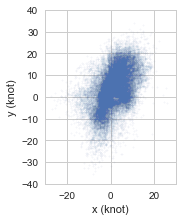

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEYpJREFUeJzt3WlQU2fbB/B/SESRRWmt1KmiAiJaZXFnUHFHa3kUF16L
aEerFaYdRacOKERFsHV3rBXFbazYFnks2I6OG4ziOyq2IFr3CiLWBQElSARZkuv9wOtpA4HklEhC
vH4zfDh37pNzJfDn3GfJHQkRERhjerMwdgGMtTQcGsZE4tAwJhKHhjGRODSMicShYUwkswpNdXU1
Vq9ejcGDB2Pw4MFYv349VCqVwfoDgFKphL+/PxQKRYN9VqxYgZ49e2r8rF69usH+d+/excyZM+Hh
4YGJEyfi3Llzul+sDp999lm9Gvbu3dtg/8zMTAQEBMDd3R1Tp07FtWvXhMdOnTqFZcuWidp+TU0N
Nm7ciKFDh8LT0xPz5s3DvXv3NPr4+fnVq/HEiRN6r280ZEbWrl1LY8eOpezsbDp//jz5+PjQ9u3b
DdafiCgmJoZ27tzZaJ8ZM2ZQXFwcFRYWCj9lZWVa+1ZUVNDw4cNJLpdTTk4Obd++nfr27Uv379/X
/YIbMWzYMEpJSdGooby8XGvfgoIC8vLyoq1bt1JOTg6tWrWKBg8eTKWlpUKfqVOn0qVLl/Te/pYt
W8jX15cuXrxI9+7do8WLF9OoUaOourqaiIgqKyupV69edPHiRY0aKysr9VrfmMwmNK9evSIPDw9K
TU0V2pKTk8nb25tUKlWT+xMRFRYWkqenJykUikZrGTRoEKWnp+tVd0pKCnl7e1NVVZXQFhwcTGvX
rtVrfW3KysrI1dWVcnJy9Oq/bds2mjx5srCsVqtp9OjRlJCQoFFncHCw3jVs2rSJTp06JSzfunWL
XF1d6cGDB8Jyz549GwyyrvWNyWyGZ7du3UJFRQUGDRoktA0YMADPnj3DgwcPmtwfAA4dOgQvLy+0
a9euwTqKioqgUCjQvXt3veq+fPkyvLy80KpVK6Ft4MCByM7O1mt9bXJyciCTyeDo6KhX/+zsbAwc
OFBYlkgk6N+/v0YNI0eORHZ2Nu7cuaPXcy5ZsgRjx44FAJSWluLAgQPo1q0bOnXqBADIzc1Fp06d
YGVl9a/WNyazCc3Tp09hZWUFW1tboe29994DABQUFDS5PwCcPXsWw4YNa7SOnJwcSCQS7N69G76+
vvjoo4+wb98+qNVqrf0LCwvRsWNHjbYOHTrg6dOnjW5HVw02NjaIiIjA0KFDMWnSJKSkpDTYX58a
2rVrh759+yI9PV1ULXv27MGgQYNw9OhRREdHQyaTCTVaWloiJCQEPj4+CAwM1PrcDa1vTGYTmoqK
CrRu3VqjzdLSEgBQVVXV5P4qlQo3b96Ei4tLo3Xcu3cPFhYWcHR0xK5duzB37lxs374de/bsEVW3
thr0lZubi1evXsHb2xt79uzB5MmTIZfLcezYsSbV4OLiguvXr4uqxc/PD8nJyQgICEBoaChyc3OF
GktLSzFlyhTs2bMH3t7eCAkJweXLl/Va35iMH1sDadOmTb1f8utlbUMAsf0VCgVUKhXs7e2Ftnnz
5iErK0tYPnbsGIKCgjBx4kS0b98eANCzZ0+UlpZi//79+Pzzz/Wuo02bNlpf58SJE/H48WNhWdsw
7quvvkJISIgwjHRzc8Nff/2FhIQETJw48V/X0L59e9FnsLp06QIAWLVqFbKysnD48GGEh4dj06ZN
qKyshI2NDQCgV69euH37Nn744Qf069dP5/rGZDahef/991FeXg6lUin8IoqKigAADg4OTe4vkUgA
QGOYtWbNGrx69UpY7tixIyQSiRCY11xcXFBcXAyVSgWpVKrxmIODg7Dd14qKirTWAAC7du1CTU2N
1sdek0ql9Y67nJ2dcfbsWa399a1BpVLBwkL34EStVuPMmTPo06eP8BwSiQTOzs4oKSkBALRq1Urj
OO51jdeuXdNrfWMym+GZm5sbrKysNP7zZ2ZmokOHDloPiMX2t7e3h0wm0/ilOTg4oGvXrsKPTCbD
mjVrMGfOHI11r1+/jm7dutULDAB4eXkhOztbIwiZmZnw8vLS+jo/+OADjW1q8+WXXyIyMlKj7caN
G3ByctLa38vLC5mZmcIyEQknKP6ppKREOO5rjIWFBVavXo3k5GShTaVS4datW8LwdsqUKfjuu++0
1qjP+kZl7NN3hhQTE0OjRo2izMxMunDhAvn4+GhcUykpKaGSkhK9+9c1bdo0io+Pb7SGjIwMcnNz
o/j4eMrPz6eUlBTy9PSkX375hYiIampqqLCwkCoqKoiISKlUko+PD0VERFBOTg7FxcWRu7t7k06t
pqSkUO/evenw4cOUn59P+/fvpw8//JB+//13Iqq9RvLPayJPnjwhDw8P2rRpE+Xk5FB0dDQNGTKE
Xrx4ofG8AQEBtG/fPiKqvb5UWFhINTU1WmvYvXs39evXj06fPk05OTkUERFBPj4+wnNu27ZNeDwv
L482b96scX1K1/rGJCEy3ofQ/vlf3hCqqqrw/fffIyMjA61atcLw4cMxY8YMYUgRExMDAJDL5Xr1
rys5ORl3797VOab+7bffkJycjCdPnsDe3h7+/v4YPXo0gNphz6JFi7BgwQL4+voCAO7fv499+/Yh
Pz8fDg4OCA4Ohru7e5Pei9TUVBw/fhzFxcVwcHDA9OnThdPKN2/eRGxsLKKiotC7d28AtXvDAwcO
4OnTp3B0dMScOXM09kzl5eVYsGAB1q9fj06dOiE9PR3x8fHYunWr1r2PWq3G0aNHkZaWBoVCAVdX
V3z66afo3Lmz8PiRI0eQnp4OhUKBLl26IDg4GG5ubnqt3xz69++v/QFjJjYzM9OYmxetoKCAPDw8
KC0tzdil/CtNeb8TExNp9uzZGm3z58+noqKippalkzH+Thrbptkc0zQHBwcHBAQEIC0tzdilNCsi
wk8//YTQ0FCh7fLly7CwsECHDh2MWJlxcGhEWrJkCS5evNjoDZvm5sSJE3B1dcWQIUOENnd3d+zY
scOIVRmP2Zxybi62trbYsGFDvdPK5mzChAmYMGGCRpspXJk3Ft7TMCYSh4YxkTg0jImkc2CqUqkQ
FRWFvLw8SCQSREdHo3Xr1oiIiIBEIkGPHj2wcuVKWFhYICkpCYmJiZDJZAgNDcXIkSOb4zUw1qx0
hubMmTMAgMTERFy6dAlbtmwBESEsLAyDBw/GihUrkJaWBk9PTyQkJODnn39GZWUlgoKC4OPjI9w5
zJi50BmaMWPGYMSIEQCAx48fw87ODhcuXBA+vDV8+HCcP38eFhYW8PLygqWlJSwtLeHo6Ijbt2/r
vLJt6LsCmgvX3bxMqW69zhvKZDKEh4fj9OnT+Pbbb3H+/Hnhrl9ra2uUlZVBqVRqfKDL2toaSqVS
53M3eKuCCcvKyuK6m5Ex6m4spHqfCFi3bh1OnjwJuVyOyspKof3ly5ews7ODjY0NXr58qdH+zxAx
Zi50hubIkSOIj48HUPvhLIlEgj59+uDSpUsAgHPnzmHAgAFwd3dHVlYWKisrUVZWhtzcXLi6ur7Z
6hkzAp3Ds3HjxmHZsmWYOXMmampqsHz5cjg7O0Mul2Pz5s1wcnKCn58fpFIpZs2ahaCgIBARFi9e
XO8jtIyZA52hadu2LbZu3Vqv/eDBg/XaAgMDERgYaJjKGDNRfHGTMZE4NIyJxKFhTCQODWMicWgY
E4lDw5hIHBrGROLQMCYSh4YxkTg0jInEoWFMJA4NYyJxaBgTiUPDmEgcGsZEavTzNNXV1Vi+fDke
PXqEqqoqhIaGwsXFhadvYm+1RkPz66+/on379tiwYQMUCgUmT54MNzc3nr6JvdUaDc348ePh5+cH
oPbrFqRSKW7

Wall time: 8.5 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        title = 'Month: %s' % (month)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4W/W9/1/aW7JkW947iUcGECCBTEhCEgol7HELtLSU
21JGy48WuG1vympZZXfRQmkZhXIpBMoqJEDCCoQAIfHetiwPWZK1t35/CMlxvJNjx2n9fp48T3x0
zvccHZ33+ezPRxSPx+PMYhazOCIgPtwXMItZzGLimCXsLGZxBGGWsLOYxRGEWcLOYhZHEGYJO4tZ
HEGYJewsZnEEYZaw/wGYjdz9+2CWsNOANWvWUF5ezh133DHi5xaLhfLycsrLy7Hb7YKe+6233mLz
5s2pvx966CGOOeYYQc/h8Xg4+eSTef311wVddxbDMUvYaYJIJOLNN98c8bM33nhjys77l7/8hZ6e
nilb3+PxcOWVV9LV1TVl55jFIGYJO0045phj6OzspLq6ethnr7/+OuXl5Yfhqg4NH3/8Meeddx61
tbWH+1L+YzBL2GlCZWUlBQUFw6RpV1cXX375JRs3bhx2zJtvvsk555zD0UcfzerVq7n//vuJRCKp
z9esWcMf//hHNm/ezJIlS1i8eDE33HADHo8HgEsuuYSPP/6Yd955h/Lycjo7O1PHvvrqq2zYsIGF
Cxdy9tlns3v37tRnnZ2dlJeX89BDD435nX7wgx8wb948/vSnPx3UPZnF5DFL2GnE+vXrh6nFb7zx
BkcddRTZ2dlDtj/77LNcddVVLFq0iIcffpiLL76Yxx57jBtvvHHIfn/4wx9wuVzce++9/PCHP+SV
V17hd7/7HQCbN2+mqqqKxYsX8+yzz2I2mwHw+/3cd999XHPNNTzwwAP4/X6uvvrq1MvAbDbz7LPP
ct555435fZ566ikeeOABTCbTId2XWUwc0sN9Af9J2LhxI48++ihNTU2UlZUBCXX41FNPHbJfNBrl
/vvv57TTTks5jFasWIFOp2Pz5s1cfvnlVFRUAJCdnc29996LSCRixYoVvPvuu/zpT39iyZIlrF69
Gq1Wi1qt5rrrruOvf/0rkPAa33333Rx99NEARCIRrr76ahobG6moqEAul6c+Gwvz5s0T7N7MYmKY
lbDTiIULF5KTk8O//vUvAKxWK3v27GHDhg1D9mtubsZutw9Tk0877TQAdu3aNWRNkUiU+jszMxNI
SFe32z3idUgkEhYtWpT6Oy8vD2DU/WcxczBL2GmESCQaoha/8cYbLFq0iJycnCH7DQwMAJCenj5k
u06nQy6Xp2xUAJVKNewcEomEFStW8Ktf/WrE61AoFIjFgz998v+xWOwgv9kspguzhJ1mrF+/nn37
9tHZ2ckbb7wxTB0GSEtLA6C/v3/IdpfLRSgUSn0+Fm688UY+/PBDnE6nMBc+ixmBWcJOMxYvXkxm
ZibPPPMMX3zxxTB1GKCkpASj0TgsEeHVV19NrTEetFott956K62trUM8y7M4sjHrdJpmiMViTjnl
FB5//PGUTXsgJBIJV111FbfeeisGg4G1a9dSV1fHQw89xMaNGyfs7FmxYgWZmZl89tlnqFQqgsHg
hI4LhUJUV1eTnZ09zHs9i8OLWQl7GLB+/XrC4fCIsdckLr74Ym6//XZ27tzJ9773PZ566ikuu+wy
7rnnnkmd65ZbbsHv92Oz2WhsbJzQMb29vVxwwQU899xzkzrXLKYeotmeTv9e6Ozs5NJLL2Xbtm2p
be+99x7f+c532Lp1K/n5+Yfx6mZxqJgl7CxmcQRhViWexSyOIMwSdhazOIIwS9hZzOIIwmxY598A
sViMaDSa6iwRj8dT/xeJREP+SSSSIamMhwNbtmzhkUceAWDVqlXccMMNQz7v7OxMVR3pdDruvPPO
VPrkfzpmnU4zGPF4nHA4TCgUIhwOp/4Fg8Eh2w78CQ/8QQ+kp1giQS6TIZPJkMvlyOVyZF/9LZPJ
UCgUSKVT8y73+/2sXr2a1157DYPBwEUXXcSPfvQjli1bltrnxz/+MUcffTTf+MY3eOKJJ/jiiy8m
Hc76d8WshJ0hiMfjhEIhfD4fXq8Xr9eLz+cjFoshFotT/6RSKVKpFJVKhcFgoL7fTlPfAP5ojEA4
RiQWIxaLIyLOKbkGtna7iCNCLhGjlIrRyMSUZ2dg1moIhUKpc0YiEWKxGLFYjHg8jkwmQ61Wp6p9
1Gq1ICSORqPEYjECgQBarZZoNIpCoRiyTywWw+v1AhAIBFAqlYd83n8XzErYw4RIJILb7R5GTqlU
ikwmQ6VSodPpMBgMyGSyUdf5w9s7efBfHwzbrpRKeOTM5Vzx4vsEItGhx1x2FivmFY+4Xjwex+/3
MzAwgNfrJRAIEA6HicViQ0is0WjQarUHpV4/8cQT3H333ahUKo4//ngeeuihIeu0t7dz4YUXIpFI
iEQiPPPMMxQVFU36PP+OmJWw04hgMIjT6cThcOD1epFIJCkSZGZmYjAYkEgkk1pTLR+dzAdzjEgk
SknU/REKhXA4HLhcLvr6+ujq6kIkEmEwGEhLS5vwtdfW1vL888/z9ttvo9PpuP7663n00Ue5/PLL
U/vccMMN3HLLLaxbt4433niDq666ipdeeumw294zAbOEnULE43F8Ph8OhwOn00kwGEQmk6HVasnL
y0On0x3yOdRy+UEcM3mSy+VysrKyyMrKAhJqq91up7+/n/b2dqLRKBqNBpPJhMFgGKbmJvHee+9x
4oknpkoHzz77bJ5++ukUYe12O83Nzaxbtw6ADRs2sHnzZhwOx2xnC2YJKzji8TherxebzYbT6SQW
i6FQKEhLSyMrK2tM9fZgoFYcjIQdJPleuxVnyI9RoSZdoSZdoUE2AUkpFovJyMggIyMDAK/XS29v
L93d3XR0dKBQKDAajWRmZiLf73wVFRXceeedXHXVVajVarZt28b8+fNTnxuNRhQKBTt37mTp0qV8
+umnqNVqjEbjpL/nvyNmCSsQotEoDoeDnp4egsEgCoWC7OxszGbzkGJxoTFZaamQSlDJB3/297pb
uPvLtwGQiyWU6Ewcl1lAocZIrlpPniaNfI2BdKVmzHU1Gg0lJSVAQvXv6emhv7+f7u5uDAYDZrMZ
nU7HihUrqK6u5uyzz0Yul7NgwQKuuOIKfvrTn7JmzRrWrl3Lww8/zK233kogEECj0fDggw/OqsNf
YdbpdIgIBAL09vZis9kQi8WkpaWRl5cnuCQdDZ80d/KtPw6vqhnN6ZSp0/Dydd9Ep0yorHd8vpU/
1n005jkMciWrs0tZZMqlypjNUvPEHUAejweLxYLX60UqlZKVlUV6evqUhY3+3TF71w4C8Xgcp9NJ
T08PXq8XpVJJUVERJpNp2iXBZCVsmkaJZj8Vtc3jGPeYgVCAl9qream9mquqlk+KsFqtlvLycqLR
KFarle7ubiwWCyaTCbPZPMy5NYuxMUvYSSAej2O327FYLESjUbRaLfPnzz+scULVJAmbY9AhFide
KuFolAZX36SOn6PPnNT+SUgkEvLz88nPz8fhcNDV1UVNTQ1arZb8/Hw0mrFV7lkkMEvYCSAej+Ny
uejo6CAcDmM0GikoKJh0CGYqoFbIkIhFRGMTs2yyDYOeaafPzyWm4xGbRYjlInyiEJ842ni/p5VA
bOS2MnMNGYd8zUajEaPRiN/vp62tjdra2pQpMZskMTZmCTsOPB4PHR0d+P1+0tLSKCoqmhFETUIl
k6JXKXF4/RPaX68eJITbH+KuLTtSfyukEkrN6VxUdDwZejVqjRyJEmp83Wzp+JJ8TRpFWuFCKyqV
ioqKCvx+Py0tLezbt4/09HRyc3OHeJZnMYhZwo4Cv99PZ2cnbrcbnU7HwoULp82RNBmoFXIMkyDs
/javyx8Y8lk

Wall time: 19 s


# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
Wall time: 2min 33s


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 1681
[  1.20190107e-11   2.51612501e-09   6.93637011e-08   2.49679707e-07
   1.16981014e-07]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWt0bOV5Jvjsukul+/1+dDlAMASbA4bEMWGFCYMhtrs9
jp04nXRwSPestMf3xIAB44BPbOwYT9rOkDFJ7LWACcZ00jYLT08nDjadOLY5OcFZAewOqnMklaS6
SFUq1b1qX+aH9H76ate+15ZUJfazFgsdae+vvl2191Pv9XkFRVEUePDgwcMJhe+4N+DBgwcPhwmP
5Dx48HCi4ZGcBw8eTjQ8kvPgwcOJhkdyHjx4ONHwSM6DBw8nGh7JefDg4UTDIzkPHjycaHgk58GD
hxMNj+Q8ePBwouGRnAcPHk40PJLz4MHDiYZHch48eDjR8EjOgwcPJxoeyXnw4OFEwyM5Dx48nGh4
JOfBg4cTDY/kPHjwcKLhkZwHDx5ONDyS8+DBw4mGR3IePHg40fBIzoMHDycaHsl58ODhRMMjOQ8e
PJxoeCTnwYOHE43AcW/Aw/FDURTUajWIogi/349gMAifzwdBEI57ax48tAxBURTluDfh4fhQrVaR
y+XQ29uLer0OANjY2MDg4CB6e3vh8/k80vPQ0fAsudcwJElCuVxGOp1GNBqFKIoIBoNQFAWKokCS
JIiiiFqtBkEQ4Pf7PdLz0HHwSO41CEVRIIoiJEmCIAiQJAnLy8uQJAmBQACyLKNUKiEcDiMQOLhF
iPSq1Sp8Ph/8fj/8fj8CgYBHeh7aFp67+hqDLMuo1+ugj31zcxOZTAZzc3MIhUKo1WpIJBIQBAH1
eh2BQADd3d3o6upCd3c3/H5/w3q0jiAIjOwCgUDTcR48HBc8S+41AnI/JUkCAIiiiHg8DlmWEQwG
0dvbi1qthkgkgmAwiP7+fkSjUVSrVZRKJeRyOSSTSUZ6RHw8mYmiCEVRUK1WkUqlMD4+jlAo5JGe
h2OFR3KvAciyDFEUIcsyBEFAPp/H+vo6hoaG0NfXh9XV1YbjBUGAoigQBAGRSASRSARDQ0NQFAWV
SgXlchk7OztIJBIIBoOM8HjSKxaLqNVqjPTIvfUsPQ9HDY/kTjgojkbJhEQigd3dXczOzjJLzWrE
QhAERmY86ZVKJezs7GBzcxOhUAjd3d1QFIWRKnAQB/RIz8NRwyO5EwpZliFJEmRZBgDUajWsra0h
FAphaWmJJRRaSRbwpEevSZaeLMtYW1tDOBxm8byuri74fHv15x7peTgqeCR3AiHLMra2tpDL5TA3
N4dsNotEIoGxsTEMDQ01EZvakiN31S58Ph+L1+3u7mJycpJlajOZDCqVCsLhcIN7a0R6hUIBfX19
CIfDHul5cAyP5E4YyD0F9ogjHo+jXC5jYWEBkUik6fjDLPvw+XyIRCLo7u4GsEe+5XIZ5XIZ29vb
qFariEQizNKLRCINpJdKpRAIBCCKomfpeXAMj+ROCNS1b/V6HYVCAQMDA1haWmLkoXcucLiEB+yR
XjQaRTQaBXBAeqVSCVtbW4z0yNKj5AdZlnrubSgU8mr0POjCI7kTAHXt29bWFlKpFEKhEKanpw3P
1SIHp+6qXahJjzowqAtDFEUkEglEo1Fm6ZklMqj31iM9DwSP5DocZL0BeySxvr4OURQxMTGB3d1d
S2u0Sz243+9HT08Penp6AACxWAx9fX2o1WpIpVKo1+sNlp4W6dXrdVQqFUZ6giAgGAx67u1rGB7J
dSjU7mmhUEA8HsfAwADm5uZQLBYtkZeexeMG8bW6hiAI6O7uxsDAAIADS69UKiGZTEIURUZ63d3d
CIfDTaS3ubnJ1vAsvdcmPJLrQPC1bwCQTCaRzWYxPT2N3t5edpxTknGDAA6DRNSWniiKjPQSiQRE
UWwoVwmHw2wvepaeR3onHx7JdRAURcH29jaCwSAikQjq9Tri8TgEQcDS0hKCwSA71upDe1Txt8NA
IBBAb28vI3ae9HZ2diBJEku4hMPhhgQFT3oU0yPi80jvZMEjuQ4BtWZls1kWp1pfX8fIyAhGRkaa
HspWyasTiU+L9DY2Ntj/JUlqEBvgSU+WZZbA4UkvEAggEAh4pNfB8EiuAyBJEhO0BIBsNotarYZT
p06xGjSnIDIsFovI5XKse+EkgAiKiK9erzdYerIsM8Lr7u5usOB40qvX68jn8xgfH/dIrwPhkVwb
Q51cqFQqKBQKCIfDOH36tGHG0KolR8fE43H09fVhZ2cHpVIJgUAAkiQ1dSZ0MoLBIILBIPr6+gAA
9XodpVIJ5XIZmUwGiqI0WHpEeqIoolQqMfdWEATP0usgeCTXpuCVQwAgk8kgmUwiEomgv7/ftCTC
CsnV63Wsra0BABYXF9nvU6kUe12+M4EsHr50o5NBklL9/f1QFKXB0stkMgCArq4uJiRKxclAo6Xn
kV57wyO5NgRf+ybLMjY2NlCpVLCwsMAevlbByy2VSiUEg0HmEguCgFAohKGhIbYHevjV9Wrq0g03
4VYZi5W90TWHQqEG0iuVSsjn86hWq7hw4YKmpQd4pNfO8EiujaB2T0ulEtbW1tDb28tas6y6oXrH
KYqCZDKJnZ0dzMzMoKenB+l02nBNrc4EcvPUpRsU0KfXahXHRQ486QWDQWQyGYyPj6NUKqFYLGJr
aws+n6+hZEWP9IC98hf6cjisLwUP2vBIrk2grn1Lp9PY2trC1NQU+vv7Ha2pJhlyT30+H06fPt0w
v4GHGZH6/f6mLGapVGoI6CuKgkKhwAbfdPJDrSgK65ENhUIYGBhgYxxLpRIKhQJSqRT8fn8D2fMW
nCzLSKVSiEaj6O3tbRgKRJ0ZHg4HHskdMyizubm5ibm5OUiSxGTJl5aWmFVEsGPJ8SD3dHh4uKnk
pNVyk0AggL6+voaA/traGiqVCnK5HOtc4C2eo4JVd9UuBEFAOBxGOBzG4OBgA+nl83lGevx184ID
WpYeDQXySM9deCR3jKDkAk3AIiIaHBzE2NhYS83zdBy5p7lcjqkBHzbIOhkZGUE4HGaxLd7i4R9+
PYuyXWCFKLVIr1qtolwuY3d3F8lkkqklAwcJDbV7W6vVAKBpKJBHes7R3nfXCQbvnpI00vr6OouT
6cGO1SXLMmKxGPx+f4MasN6a6v+7AT62pXbz6OE3Go7TDnDyXvDzMYj0VldXEQgEmoYC8ZPQiMxo
6JB65q1HevbhkdwRQ0v3LR6PQ1EUwziZeg0zFAoFyLKMvr4+zY6I44KWxcMPx+HnRJB10wrccldb
XYMyrn19fWwGBl13LpdDIpFAKBRqSGTokd7m5iYmJycbJqG1y+fbjvBI7gihnpqVy+WwsbGBoaEh
NuPUDGY3syzLzD0VBAGjo6OW9nZcbVzq4Tg0J6JUKkGWZayuruqqBx8VDiOuZ2coED8JTRAElMtl
1gXjWXrm8EjuiMDXvimKgo2NDRSLRczPz7MSBSswciVpWE0gEMDi4iJeffVVy2uq/92qBQU4I071
nIjp6WmWvU2n06jVag3WTicVJhuRpdFQoGw2i83NTTYUiLLXdB7gubdG8EjukKHVmrW2toauri4s
LS3B7/dDkiRbYwG1jiWrcHR0FMPDwyzpYGef7fgg6KkH85py6ho9/jqOsqDYzXV4sh8eHm6wcBVF
wcWLFzWHAvGkJ4qiR3rwSO5QoW6s397eRiqVwsTEBAYHB9nv7QT61cfKsoxEIoF8Pt/UsG9nTbfh
FimoYaQpp9V0307k3cpeeNLLZDJYXFxEtVpFqVQyHQoEaJNetVpFT0/Pie/I8EjuEKAoCiRJwksv
vYTTp08DADY2NlCr1bC4uMjEHAl2s5l0bLVaZbNUzRr2raxJN3onacyp5ZXUTfeiKGJ7exu9vb2s
Fcsu2o0ogUb

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.527   3.804   7.626  4.729  7.014   0.210
2  0.315  -1.538   0.500  1.639  2.034   0.327
3  0.157  -5.095  -6.116  4.579  7.337  -0.138

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

GMM Plot Result
0.527341426324 [[ 3.80380591  7.62564596]] [ 4.5450565   7.13393563] 166.274568766
0.315246142936 [[-1.53779493  0.50014435]] [ 1.44980801  2.17274304] 151.818567384
0.157412430739 [[-5.09524547 -6.11621199]] [ 4.50800304  7.38124109] -172.097756019


In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmQZGd5JvqcXKsqa8na9+paWshCAkxLSI6xhcYKFII2
2MaAbXzxvfLoMg4PA2YxICEJMRJtNiPGF/kqjMYDEUhxJaHBBgXcHwYLFAaztPuKMZLg3q7srqqs
qlwqt8o98yz3R/X71Zcnz5p5siqzdJ4Ihboqz/nyO5XnPPmuzysoiqLAhQsXLk4oPMe9ARcuXLjo
JFySc+HCxYmGS3IuXLg40XBJzoULFycaLsm5cOHiRMMlORcuXJxouCTnwoWLEw2X5Fy4cHGi4ZKc
CxcuTjRcknPhwsWJhktyLly4ONFwSc6FCxcnGi7JuXDh4kTDJTkXLlycaLgk58KFixMNl+RcuHBx
ouGSnAsXLk40XJJz4cLFiYZLci5cuDjRcEnOhQsXJxouyblw4eJEwyU5Fy5cnGi4JOfChYsTDZfk
XLhwcaLhkpwLFy5ONHzHvQEXxw9FUVCr1SCKIrxeL/x+PzweDwRBOO6tuXDRNgRFUZTj3oSL40O1
WkUul8PQ0BDq9ToAYGdnB6OjoxgaGoLH43FJz0VPw7XkXsaQJAnlchnJZBKhUAiiKMLv90NRFCiK
AkmSIIoiarUaBEGA1+t1Sc9Fz8EluZchFEWBKIqQJAmCIECSJKyvr0OSJPh8PsiyjFKphGAwCJ/v
8BYh0qtWq/B4PPB6vfB6vfD5fC7puehauO7qywyyLKNer4M+9t3dXaTTaSwtLSEQCKBWqyEWi0EQ
BNTrdfh8PgwMDKC/vx8DAwPwer0N69E6giAwsvP5fE3HuXBxXHAtuZcJyP2UJAkAIIoiotEoZFmG
3+/H0NAQarUa+vr64Pf7MTIyglAohGq1ilKphFwuh3g8zkiPiI8nM1EUoSgKqtUqEokEpqenEQgE
XNJzcaxwSe5lAFmWIYoiZFmGIAjI5/PY3t7G2NgYhoeHsbm52XC8IAhQFAWCIKCvrw99fX0YGxuD
oiioVCool8vIZrOIxWLw+/2M8HjSKxaLqNVqjPTIvXUtPRdHDZfkTjgojkbJhFgshv39fSwuLjJL
zWrEQhAERmY86ZVKJWSzWezu7iIQCGBgYACKojBSBQ7jgC7puThquCR3QiHLMiRJgizLAIBarYat
rS0EAgGsra2xhEI7yQKe9Og9ydKTZRlbW1sIBoMsntff3w+P56D+3CU9F0cFl+ROIGRZxt7eHnK5
HJaWlpDJZBCLxTA1NYWxsbEmYlNbcuSu2oXH42Hxuv39fczOzrJMbTqdRqVSQTAYbHBvjUivUChg
eHgYwWDQJT0XLcMluRMGck+BA+KIRqMol8tYWVlBX19f0/GdLPvweDzo6+vDwMAAgAPyLZfLKJfL
SKVSqFar6OvrY5ZeX19fA+klEgn4fD6Iouhaei5ahktyJwTq2rd6vY5CoYBwOIy1tTVGHnrnAp0l
POCA9EKhEEKhEIBD0iuVStjb22OkR5YeJT/IstRzbwOBgFuj50IXLsmdAKhr3/b29pBIJBAIBDA/
P294rhY5tOqu2oWa9KgDg7owRFFELBZDKBRilp5ZIoN6b13Sc0FwSa7HQdYbcEAS29vbEEURMzMz
2N/ft7RGt9SDe71eDA4OYnBwEAAQiUQwPDyMWq2GRCKBer3eYOlpkV69XkelUmGkJwgC/H6/696+
jOGSXI9C7Z4WCgVEo1GEw2EsLS2hWCxaIi89i8cJ4mt3DUEQMDAwgHA4DODQ0iuVSojH4xBFkZHe
wMAAgsFgE+nt7u6yNVxL7+UJl+R6EHztGwDE43FkMhnMz89jaGiIHdcqyThBAJ0gEbWlJ4oiI71Y
LAZRFBvKVYLBINuLnqXnkt7Jh0tyPQRFUZBKpeD3+9HX14d6vY5oNApBELC2tga/38+OtfrQHlX8
rRPw+XwYGhpixM6TXjabhSRJLOESDAYbEhQ86VFMj4jPJb2TBZfkegTUmpXJZFicant7GxMTE5iY
mGh6KNslr14kPi3S29nZYf+XJKlBbIAnPVmWWQKHJz2fzwefz+eSXg/DJbkegCRJTNASADKZDGq1
Gk6dOsVq0FoFkWGxWEQul2PdCycBRFBEfPV6vcHSk2WZEd7AwECDBceTXr1eRz6fx/T0tEt6PQiX
5LoY6uRCpVJBoVBAMBjE6dOnDTOGVi05OiYajWJ4eBjZbBalUgk+nw+SJDV1JvQy/H4//H4/hoeH
AQD1eh2lUgnlchnpdBqKojRYekR6oiiiVCox91YQBNfS6yG4JNel4JVDACCdTiMej6Ovrw8jIyOm
JRFWSK5er2NrawsAsLq6yn6fSCTY+/KdCWTx8KUbvQySlBoZGYGiKA2WXjqdBgD09/czIVEqTgYa
LT2X9LobLsl1IfjaN1mWsbOzg0qlgpWVFfbwtQtebqlUKsHv9zOXWBAEBAIBjI2NsT3Qw6+uV1OX
bjgJp8pYrOyNrjkQCDSQXqlUQj6fR7VaxaVLlzQtPcAlvW6GS3JdBLV7WiqVsLW1haGhIdaaZdUN
1TtOURTE43Fks1ksLCxgcHAQyWTScE2tzgRy89SlGxTQp/dqF8dFDjzp+f1+pNNpTE9Po1QqoVgs
Ym9vDx6Pp6FkRY/0gIPyF/py6NSXggttuCTXJVDXviWTSezt7WFubg4jIyMtrakmGXJPPR4PTp8+
3TC/gYcZkXq93qYsZqlUagjoK4qCQqHABt/08kOtKArrkQ0EAgiHw2yMY6lUQqFQQCKRgNfrbSB7
3oKTZRmJRAKhUAhDQ0MNQ4GoM8NFZ+CS3DGDMpu7u7tYWlqCJElMlnxtbY1ZRQQ7lhwPck/Hx8eb
Sk7aLTfx+XwYHh5uCOhvbW2hUqkgl8uxzgXe4jkqWHVX7UIQBASDQQSDQYyOjjaQXj6fZ6THXzcv
OKBl6dFQIJf0nIVLcscISi7QBCwiotHRUUxNTbXVPE/HkXuay+WYGnCnQdbJxMQEgsEgi23xFg//
8OtZlN0CK0SpRXrVahXlchn7+/uIx+NMLRk4TGio3dtarQYATUOBXNJrHd19d51g8O4pSSNtb2+z
OJke7FhdsiwjEonA6/U2qAHrran+vxPgY1tqN48efqPhON2AVv4W/HwMIr3NzU34fL6moUD8JDQi
Mxo6pJ5565Kefbgkd8TQ0n2LRqNQFMUwTqZewwyFQgGyLGN4eFizI+K4oGXx8MNx+DkRZN20A6fc
1XbXoIzr8PAwm4FB153L5RCLxRAIBBoSGXqkt7u7i9nZ2YZJaN3y+XYjXJI7QqinZuVyOezs7GBs
bIzNODWD2c0syzJzTwVBwOTkpKW9HVcbl3o4Ds2JKJVKkGUZm5ubuurBR4VOxPXsDAXiJ6EJgoBy
ucy6YFxLzxwuyR0R+No3RVGws7ODYrGI5eVlVqJgBUauJA2r8fl8WF1dxcWLFy2vqf65XQsKaI04
1XMi5ufnWfY2mUyiVqs1WDu9VJhsRJZGQ4EymQx2d3fZUCDKXtN5gOveGsEluQ5DqzVra2sL/f39
WFtbg9frhSRJtsYCah1LVuHk5CTGx8dZ0sHOPrvxQdBTD+Y15dQ1evx1HGVBsZPr8GQ/Pj7eYOEq
ioLLly9rDgXiSU8URZf04JJcR6FurE+lUkgkEpiZmcHo6Cj7vZ1Av/pYWZYRi8WQz+ebGvbtrOk0
nCIFNYw05bSa7ruJvNvZC0966XQaq6urqFarKJVKpkOBAG3Sq1arGBwcPPEdGS7JdQCKokCSJLzw
wgs4ffo0AGBnZwe1Wg2rq6tMzJFgN5tJx1arVTZL1axh38qadKP3ksacWl5J3XQviiJSqRSGhoZY
K5ZddBtRAo2

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGk5JREFUeJzt3XtQU2feB/BvCIIIKqUqFxGtCK329YYWbOtKja9LX0da
Oki5KDtd3dmVxQtKFaoiXoKXRZzZ1WKndnVXkF2U3Vlldme6LrW6rYPXhnqhgrgNyK2IsCZoCyTP
+wfNMYEkJ4FwkkN+nxlmzDk5Ob8oX5/nnDx5HgljjIEQIhou9i6AEGIdCi0hIkOhJURkKLSEiAyF
lhCRodASIjKuQp6sq6sLW7ZsQX19PTo7O5GSkoIpU6YgMzMTEokEISEhyM7OhosL/V9CiCmChvbs
2bPw9vZGbm4u2tvbERMTg5deeglpaWmIiIjA9u3bUVZWhsWLFwtZFiGiImiT9uabb2L9+vUAAMYY
pFIpbt++jfDwcADAggULcOnSJSFLIkR0BG1pPT09AQBqtRrr1q1DWloa9u/fD4lEwu1XqVS8r3P9
+vVBrZOI35w5c3if85WiDFqNt9F9bm5umD59uq3LsglBQwsAjY2NSE1NRVJSEqKjo5Gbm8vt6+jo
wKhRoyx6nVPyi4NVosVUahVGeo20dxlURy/vbltg0fO0Gm/4Bu01uq+59gNblmRTgnaPHz58iJUr
V2LTpk1YtmwZAGDatGm4fPkyAODixYuYO3eukCURIjqChvajjz7C48ePkZ+fj+TkZCQnJyMtLQ2H
Dh1CfHw8urq6EBUVJWRJhIiOoN3jbdu2Ydu2bX22FxYWClkGIaJGH4gSIjIUWkJEhkJLiMhQaAkR
GQotISJDoSVEZCi0hIgMhZYQK2m1Wmzfvh3x8fFITk6GUqk02P/ZZ58hNjYW8fHxOHXqlMG+iooK
JCcnc49bW1uRkpKC5cuXIyEhAbW1tbznF3zsMSFi969//QudnZ0oLi6GQqHAvn37cOTIEQA93xnf
u3cvSkpK4OHhgcTERMhkMowZMwZHjx7F2bNn4eHhwb1Wbm4uoqOjsWTJEpSXl+P+/fsICgoye35q
aYlTa/n+ntEfc65fv46f/OQnAIBZs2bh1q1b3L6amhoEBQVh9OjRcHNzw5w5c3D16lUAQFBQEA4d
OmTwWjdu3EBzczPee+89lJaWcl9TNYdCS5zafbbI6I85arUaXl5e3GOpVIru7m5u38iRz77p5Onp
CbVaDQCIioqCq6th57a+vh6jRo3CH/7wB/j7++Po0aO8NVNoCbGSl5cXOjo6uMdarZYLY+99HR0d
BiHuzdvbGzKZDAAgk8kMWm1TKLSEWCksLAwXL/Z8n1uhUCA0NJTbFxwcDKVSifb2dnR2duLatWuY
PXu2ydeaM2cOLly4AAC4evUqpkyZwnt+uhFFiJUWL16ML7/8EgkJCWCMYc+ePSgtLcWTJ08QHx+P
zMxMrFq1CowxxMbGwtfX1+RrZWRkYNu2bfjzn/8MLy8v5OXl8Z6fQkuIlVxcXLBr1y6DbcHBwdyf
ZTIZ1+XtLTAw0OBjoPHjx+P48ePWnd+qZxNC7I5CS4jIUPfYSVQ9emp0e6iPh9HtxHFRaJ2ALrDB
0ycYbK+5WYeqR08puCJD3eMhrOrRU1Q9eorg6RP6BBZ4FmJTrTBxTBTaIUgXVqBv69ob337ieKh7
PITot5jWhpG6yeJBLe0Qod+yWhtYam3FhUI7BDx42rMWUn/DV3OzzpblkEFGoRU5S69d+VDXWDzo
mnYI8A9+3t4liNZ99QOj2ycJW4ZV7BLaiooKHDhwAAUFBVAqlbQSfD/Z4qMaZ+8at2tes3cJVhM8
HUePHsW2bdvwww8/AAD27t2LtLQ0FBUVgTGGsrIyoUsSNVvcRKKusbgIHtreU27QSvD9oxs0MRDO
3sqKleDd46ioKDx48Ow6gjFm9UrwQM8Cxo7AXnVoNBKDvytL/94MX0ODQA9m0/fgKP8uQ5ndb0Tp
X79asxK8I6w4bs+Vz6WdT7lpTFQqldkpTUz5TtqOkV626xo7ykrwQ53d7/jQSvDWo7HCzs3uoc3I
yKCV4PuBRjE5L7t0j/Wn3HjhhRdoJXhCrGD3lpYQYh0KrcjY4qMegD7uETMKrROjQRXiRKEVEbpr
7BhsuWpeZWUlkpKSkJycjFWrVuHhw4e856fQigzdNbY//VXz0tPTsW/fPm6fbtW8Y8eOoaCgAMXF
xVwQew/hBYCcnBxkZWWhoKAAixcvprV8hhJbtrJ0PTswtlw17+DBg5g6dSqAnhFq7u7uvOe3+4go
YjlbtrJ0Pdujsr3J+I4Rpo8xtWqeq6sr76p5+kN4AWDcuHEAepa8LCwsxMmTJ3lrptASp+apnWr1
MbZcNQ8A/vGPf+DIkSP4+OOP4ePjw3t+6h6LAHWNHYstV807c+YMCgsLUVBQgAkTLOtJUUsrEtQ1
dhy2WjVPo9EgJycH/v7+WLt2LQDglVdewbp168yen0Lr4OhjHsdjq1XzpFIprly5Yv35rT6CCM5W
rSx1jYcGi1palUqF2tpauLi4IDAwsF/f3STWs6SVvalqQ7dGA1dVNwBg+sjnzD6fusbiZza0Fy5c
wCeffIJ79+7Bz88Prq6uaGxsRHBwMFauXInIyEih6nRa5lrZm6o2AEDA+FHcf6Q3q3s+wuALLxEv
k6HNzMzEmDFjsH37doSEhBjsq66uRklJCUpLS3HgwIFBL9IZmftigC6sABAc4mcw1UxwiB9qqk18
9kiGBJOh3bBhg8m7XiEhIfjggw/Q1ES/HIPBXLdYF9jgED+zr3FT1Wa0taU1e8TP5I0oXWB3797d
Z19GRgYAwM/P/C8OsZ6pFQNuqtosDqyp/bS05dBgsqXdunUr6urqcOvWLVRXV3Pbu7u7+zXzH+Fn
LrCAYRgrOlq4P2uYBtKO7zHTc2yf43q3tsHTJ9Bi0iJnMrQpKSmor69HTk4O1qxZw22XSqUGn0kR
2zAWWL6whk7sGbeqUqvQ2PoUFR0tXHDNXdvqgkvEyWRoAwMDERgYiLNnz6KqqgpXrlxBd3c3IiIi
4O3tLWSNTkMX2N43mowFtbfQieNQpfzOILh8qLUVJ97BFWfOnMGvf/1rPHjwAA0NDUhNTUVJSYkQ
tTkN/TvF+q2rOkDKBTZ04jg8CWBQdDX3+alyVXHPsRRd34oX7+CKY8eO4fTp03juuZ5ro9WrV+Nn
P/sZli1bNujFOQP90OgHVhfWJwEMAKDoasbUgJ5Q3mW1AIAXJUEAega/KFTNmDWs5+ahpa0tdZOB
Oy3fGd/h9bKwhViBN7RarZYLLAD4+Phwy3iQgdG/jtUFVte6hk4cB0VXMwDAxf97AM/CCgDTxo7D
nZaex93DNXBReULR1YxZE31RpTTxi2imDmftJuv+4xMT3tC++OKLyMnJ4VrWkpISvPTSS4NemLPQ
v/GkDpACABfYqQHjuKBOGzsOHS6V3HM70IqJP36MXlPvDRf/76FtHG51YKm1FR/e0Mrlcvzud7/D
li1bwBhDREQEsrOzhahtSOvdLdZ1iXWBdfH/HndZLSb6tgLoCelUbz94S5+tKtiueQ2V7U2Y5NuK
B63PrmctvRFFxIk3tMOHD8fmzZuFqMXp6LeyumtY/RZWF9hnYb0PAJjsFQgAuK++hFefB75ontjn
ta0Zyhg8fQKqbtY5bRdZbHhD+9e//hX79+/H48ePATxbmrKyspLnSMtptVrs2LEDd+/ehZubG+Ry
OSZO7PuLONTpWtm7rLanO/xj66qjC+tkSRnus0WY7BWI++oHpl6OG1hhqvvbexCHM1/biglvaD/8
8EMUFBQYTKlha/pTUioUCuzbtw9HjhwZtPOJjX6XWEcXXACY7VNl0D3WtbL6Ye0dxqpHT1Fzs44L
Lo2UEg/ez2l

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.954  0.016      0.137  9.106805e-08      0.018       0.517

# 6. GMM by Optimization

In [55]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [56]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.134561201291806
     jac: array([ -3.70478153e-01,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.38418579e-07,
        -3.70479345e-01,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   2.38418579e-07,
        -3.70472431e-01,  -4.76837158e-07,  -4.76837158e-07,
        -4.76837158e-07,  -2.38418579e-07,   2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1317
     nit: 65
    njev: 65
  status: 0
 success: True
       x: array([ 0.21330878, -0.83582576,  2.66035134,  3.50604959,  8.79788826,
        0.83561532,  0.56732799,  2.93554382,  5.53401313,  6.10599862,
        8.87034346,  0.38735523,  0.21936323, -1.52886429,  0.39419885,
        1.74083302,  1.49854763,  0.19559174])

## 6.1 GMM Result

In [57]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.567   2.936  5.534  6.106  8.870  0.387
2  0.219  -1.529  0.394  1.741  1.499  0.196
3  0.213  -0.836  2.660  3.506  8.798  0.836

In [58]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

GMM Plot Result
0.567327989208 [[ 2.93554382  5.53401313]] [ 5.33950116  9.35178804] 157.30743686
0.219363227905 [[-1.52886429  0.39419885]] [ 1.41222281  1.81156599] -63.7818854006
0.213308782887 [[-0.83582576  2.66035134]] [ 1.82319697  9.29360933] 160.814979541


## 6.2 Goodness-of-fit statistics

In [59]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.027      0.086  3.618717e-08      0.011       0.326

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuQK3d1Lvp16zEaaaR5z+x5v7bNNQQD2wYOYEgdXxyI
bzi5gQAh5N7rQKhTCbF5+ARjbMcUsIN5mXNPnOMLTrCrbLi28TmE+OJbKd6ucgLB7OucijGPvef9
kDQajd6PVj/uH9qr56dWd6u71ZqRhv6qXJ4ttX5qSa1P67fWt77FKYqiwIMHDx5OKfiTPgEPHjx4
6CQ8kvPgwcOphkdyHjx4ONXwSM6DBw+nGh7JefDg4VTDIzkPHjycangk58GDh1MNj+Q8ePBwquGR
nAcPHk41PJLz4MHDqYZHch48eDjV8EjOgwcPpxoeyXnw4OFUwyM5Dx48nGp4JOfBg4dTDY/kPHjw
cKrhkZwHDx5ONTyS8+DBw6mGR3IePHg41fBIzoMHD6caHsl58ODhVMMjOQ8ePJxqeCTnwYOHUw2P
5Dx48HCq4ZGcBw8eTjX8J30CHk4eiqJAEASIogifz4dAIACe58Fx3EmfmgcPbYNTFEU56ZPwcHKo
VqvIZrOIRqOo1WoAgN3dXQwPDyMajYLneY/0PPQ0vEju1xiSJKFcLmN/fx+RSASiKCIQCEBRFCiK
AkmSIIoiBEEAx3Hw+Xwe6XnoOXgk92sIRVEgiiIkSQLHcZAkCZcuXYIkSfD7/ZBlGaVSCX19ffD7
jy4RIr1qtQqe5+Hz+eDz+eD3+z3S89C18Larv2aQZRm1Wg30se/t7SGdTmN+fh7BYBCCICAej4Pj
ONRqNfj9foTDYfT39yMcDsPn8zWsR+twHKeSnd/vbzrOg4eTghfJ/ZqAtp+SJAEARFHE9vY2ZFlG
IBBANBqFIAgIhUIIBAIYHBxEJBJBtVpFqVRCNptFIpFQSY+IjyUzURShKAqq1SqSySQmJycRDAY9
0vNwovBI7tcAsixDFEXIsgyO45DP57Gzs4ORkRHEYjFsbm42HM9xHBRFAcdxCIVCCIVCGBkZgaIo
qFQqKJfLyGQyiMfjCAQCKuGxpFcsFiEIgkp6tL31Ij0Pxw2P5E45KI9GxYR4PI5cLoe5uTk1UrOa
seA4TiUzlvRKpRIymQz29vYQDAYRDoehKIpKqsBRHtAjPQ/HDY/kTilkWYYkSZBlGQAgCAK2trYQ
DAaxsrKiFhTaKRawpEfPSZGeLMvY2tpCX1+fms/r7+8Hz9f15x7peTgueCR3CiHLMlKpFLLZLObn
53F4eIh4PI6JiQmMjIw0EZs2kqPtql3wPK/m63K5HKamptRKbTqdRqVSQV9fX8P21oz0CoUCYrEY
+vr6PNLz4BgeyZ0y0PYUqBPH9vY2yuUylpaWEAqFmo7vpOyD53mEQiGEw2EAdfItl8sol8s4ODhA
tVpFKBRSI71QKNRAeslkEn6/H6IoepGeB8fwSO6UQKt9q9VqKBQKGBoawsrKikoeRo8FOkt4QJ30
IpEIIpEIgCPSK5VKSKVSKulRpEfFD4osjba3wWDQ0+h5MIRHcqcAWu1bKpVCMplEMBjEzMyM6WP1
yMHpdtUutKRHHRjUhSGKIuLxOCKRiBrptSpkUO+tR3oeCB7J9TgoegPqJLGzswNRFHHmzBnkcjlL
a3SLHtzn82FgYAADAwMAgNXVVcRiMQiCgGQyiVqt1hDp6ZFerVZDpVJRSY/jOAQCAW97+2sMj+R6
FNrtaaFQwPb2NoaGhjA/P49isWiJvIwiHjeIr901OI5DOBzG0NAQgKNIr1QqIZFIQBRFlfTC4TD6
+vqaSG9vb09dw4v0fj3hkVwPgtW+AUAikcDh4SFmZmYQjUbV45ySjBsE0AkS0UZ6oiiqpBePxyGK
YoNcpa+vTz0Xo0jPI73TD4/kegiKouDg4ACBQAChUAi1Wg3b29vgOA4rKysIBALqsVa/tMeVf+sE
/H4/otGoSuws6WUyGUiSpBZc+vr6GgoULOlRTo+IzyO90wWP5HoE1Jp1eHio5ql2dnYwNjaGsbGx
pi9lu+TVi8SnR3q7u7vq/yVJajAbYElPlmW1gMOSnt/vh9/v90ivh+GRXA9AkiTV0BIADg8PIQgC
FhYWVA2aU7B9quxtpwFEUER8tVqtIdKTZVklvHA43BDBsaRXq9WQz+cxOTnpkV4PwiO5Loa2uFCp
VFAoFNDX14ezZ8+aVgx7eRvaKQQCAQQCAcRiMQBArVZDqVRCuVxGOp2GoigNkR6RniiKKJVK6vaW
4zgv0usheCTXpWCdQwAgnU4jkUggFAphcHCwpSTCKsnRlzOXyyGbzaoi3F8HgiRLqcHBQSiK0hDp
pdNpAEB/f79qJMpGvGyk55Fed8MjuS4Eq32TZRm7u7uoVCpYWlpSv3xugUh0b28Pg4ODKBQKKBaL
4HketVpN3cqdhM7MLRmLFcLhOA7BYBDBYLCB9EqlEvL5PKrVKtbW1nQjPcAjvW6GR3JdBO32tFQq
YWtrC9FoVG3NshOhtTqOnEkAYHl5WT0+mUwCqEc6uVwOiUQCgUCgQZ5hhfTcIKmTIgeW9AKBANLp
NCYnJ1EqlVAsFpFKpcDzfMN7YkR6QF3+QmJmVs/nofPwSK5LoNW+7e/vI5VKYXp6GoODg47WNCOZ
XC6HnZ0djI+Po1wuw+fzqY39RKbDw8MYHh5u8I07PDzE3t6e6iaibawnnKYvsaIoao9sMBjE0NCQ
OsaxVCqhUCggmUzC5/M1FDLYCE6WZSSTSUQiEUSj0YahQNSZ4aEz8EjuhKEoCorFIvb29jA/Pw9J
klRb8pWVFQSDwYbj7ebatJBlGYlEArlcTq3OJpNJ0zVZ37jR0VHVN06vsZ5Ir1tgdbtqFxzHoa+v
D319feoPAZFePp9XSY+1imcNB/QiPRoK5JGeu/BI7gRBxQWagEW25MPDw5iYmGireV7vONqe+v3+
ltVZM7C+cfQ6qEpJPaYA1N7ZXt+eWSFKPdKrVqsol8vqlp/ckoGjgoZ2eysIAgA0DQXq5ffvpOGR
3AmB3Z6SNdLOzg5mZ2fVtiU92JGGsMdls1ns7u5ifHwco6OjTbo4Og/2/1bB83xDu5UkSdjY2FBd
RERRNBTh9gKc5BbZ+RhEepubm/D7/U1DgdhJaPS+0NAh7cxbj/TswyO5Y4ae79v29jYURcHZs2cb
5pyardEKbIQQj8eRz+ddEQ9bAW29RkZGEAqFVJ0Z5fRIj8aKcDsFt7ar7a5BFddYLKbOwCCr+Gw2
i3g8jmAw2FTc0SO9vb09TE1NNUxC80jPGB7JHSO0U7MouhoZGVFnnLaCnZ5UWZaxurqKYDDYcnva
SV2c3+9HLBZrEuFSTo/cRtiEfTehE3k9O0OB2EloHMehXC6rXTBepNca3XU1nWKw2jdFUbC7u4ti
sYjFxUVVomAFVreSuVwOiqJgeHhYd66Ddk3tvyl31A6MzlMrwtVWKf1+P/r7+9VhPJ2M9I4TZmRp
NhSIrWjT+6J1c/a2t8bwSK7D0GvN2traQn9/P1ZWVuDz+SBJkq2xgGbHsttTABgdHbV8nifxRTBK
2JdKJSiKok4YY6uUZlbuWhynoNjNddjijrairSgK1tfXdYcCsaQniqJHevBIrqPQNtYfHBwgmUzi
zJkzGB4eVm+3k+g3O7ZarTaMHfz5z39ueU234XRNNmF/eHiIubk5SJKkO/HLSKPn1rm4jXbIkiW9
dDqN5eVl9ceg1VAgQJ/0qtUqBgYGTn1HhkdyHYCiKJAkCc8//zzOnj0LANjd3YUgCFheXlbNHAl2
q5l6x1J+j8YOOjlnutC7qblfT6NHcyBIo0f3a+dAuIWTinL1QJ+LnoxHbyiQGemtr69jYWFBFSST
OJmNCE8DPJJ

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGk5JREFUeJzt3XtQU2feB/BvCIIIKqUqFxGtCK329YYWbOtKja9LX0da
Oki5KDtd3dmVxQtKFaoiXoKXRZzZ1WKndnVXkF2U3Vlldme6LrW6rYPXhnqhgrgNyK2IsCZoCyTP
+wfNMYEkJ4FwkkN+nxlmzDk5Ob8oX5/nnDx5HgljjIEQIhou9i6AEGIdCi0hIkOhJURkKLSEiAyF
lhCRodASIjKuQp6sq6sLW7ZsQX19PTo7O5GSkoIpU6YgMzMTEokEISEhyM7OhosL/V9CiCmChvbs
2bPw9vZGbm4u2tvbERMTg5deeglpaWmIiIjA9u3bUVZWhsWLFwtZFiGiImiT9uabb2L9+vUAAMYY
pFIpbt++jfDwcADAggULcOnSJSFLIkR0BG1pPT09AQBqtRrr1q1DWloa9u/fD4lEwu1XqVS8r3P9
+vVBrZOI35w5c3if85WiDFqNt9F9bm5umD59uq3LsglBQwsAjY2NSE1NRVJSEqKjo5Gbm8vt6+jo
wKhRoyx6nVPyi4NVosVUahVGeo20dxlURy/vbltg0fO0Gm/4Bu01uq+59gNblmRTgnaPHz58iJUr
V2LTpk1YtmwZAGDatGm4fPkyAODixYuYO3eukCURIjqChvajjz7C48ePkZ+fj+TkZCQnJyMtLQ2H
Dh1CfHw8urq6EBUVJWRJhIiOoN3jbdu2Ydu2bX22FxYWClkGIaJGH4gSIjIUWkJEhkJLiMhQaAkR
GQotISJDoSVEZCi0hIgMhZYQK2m1Wmzfvh3x8fFITk6GUqk02P/ZZ58hNjYW8fHxOHXqlMG+iooK
JCcnc49bW1uRkpKC5cuXIyEhAbW1tbznF3zsMSFi969//QudnZ0oLi6GQqHAvn37cOTIEQA93xnf
u3cvSkpK4OHhgcTERMhkMowZMwZHjx7F2bNn4eHhwb1Wbm4uoqOjsWTJEpSXl+P+/fsICgoye35q
aYlTa/n+ntEfc65fv46f/OQnAIBZs2bh1q1b3L6amhoEBQVh9OjRcHNzw5w5c3D16lUAQFBQEA4d
OmTwWjdu3EBzczPee+89lJaWcl9TNYdCS5zafbbI6I85arUaXl5e3GOpVIru7m5u38iRz77p5Onp
CbVaDQCIioqCq6th57a+vh6jRo3CH/7wB/j7++Po0aO8NVNoCbGSl5cXOjo6uMdarZYLY+99HR0d
BiHuzdvbGzKZDAAgk8kMWm1TKLSEWCksLAwXL/Z8n1uhUCA0NJTbFxwcDKVSifb2dnR2duLatWuY
PXu2ydeaM2cOLly4AAC4evUqpkyZwnt+uhFFiJUWL16ML7/8EgkJCWCMYc+ePSgtLcWTJ08QHx+P
zMxMrFq1CowxxMbGwtfX1+RrZWRkYNu2bfjzn/8MLy8v5OXl8Z6fQkuIlVxcXLBr1y6DbcHBwdyf
ZTIZ1+XtLTAw0OBjoPHjx+P48ePWnd+qZxNC7I5CS4jIUPfYSVQ9emp0e6iPh9HtxHFRaJ2ALrDB
0ycYbK+5WYeqR08puCJD3eMhrOrRU1Q9eorg6RP6BBZ4FmJTrTBxTBTaIUgXVqBv69ob337ieKh7
PITot5jWhpG6yeJBLe0Qod+yWhtYam3FhUI7BDx42rMWUn/DV3OzzpblkEFGoRU5S69d+VDXWDzo
mnYI8A9+3t4liNZ99QOj2ycJW4ZV7BLaiooKHDhwAAUFBVAqlbQSfD/Z4qMaZ+8at2tes3cJVhM8
HUePHsW2bdvwww8/AAD27t2LtLQ0FBUVgTGGsrIyoUsSNVvcRKKusbgIHtreU27QSvD9oxs0MRDO
3sqKleDd46ioKDx48Ow6gjFm9UrwQM8Cxo7AXnVoNBKDvytL/94MX0ODQA9m0/fgKP8uQ5ndb0Tp
X79asxK8I6w4bs+Vz6WdT7lpTFQqldkpTUz5TtqOkV626xo7ykrwQ53d7/jQSvDWo7HCzs3uoc3I
yKCV4PuBRjE5L7t0j/Wn3HjhhRdoJXhCrGD3lpYQYh0KrcjY4qMegD7uETMKrROjQRXiRKEVEbpr
7BhsuWpeZWUlkpKSkJycjFWrVuHhw4e856fQigzdNbY//VXz0tPTsW/fPm6fbtW8Y8eOoaCgAMXF
xVwQew/hBYCcnBxkZWWhoKAAixcvprV8hhJbtrJ0PTswtlw17+DBg5g6dSqAnhFq7u7uvOe3+4go
YjlbtrJ0Pdujsr3J+I4Rpo8xtWqeq6sr76p5+kN4AWDcuHEAepa8LCwsxMmTJ3lrptASp+apnWr1
MbZcNQ8A/vGPf+DIkSP4+OOP4ePjw3t+6h6LAHWNHYstV807c+YMCgsLUVBQgAkTLOtJUUsrEtQ1
dhy2WjVPo9EgJycH/v7+WLt2LQDglVdewbp168yen0Lr4OhjHsdjq1XzpFIprly5Yv35rT6CCM5W
rSx1jYcGi1palUqF2tpauLi4IDAwsF/f3STWs6SVvalqQ7dGA1dVNwBg+sjnzD6fusbiZza0Fy5c
wCeffIJ79+7Bz88Prq6uaGxsRHBwMFauXInIyEih6nRa5lrZm6o2AEDA+FHcf6Q3q3s+wuALLxEv
k6HNzMzEmDFjsH37doSEhBjsq66uRklJCUpLS3HgwIFBL9IZmftigC6sABAc4mcw1UxwiB9qqk18
9kiGBJOh3bBhg8m7XiEhIfjggw/Q1ES/HIPBXLdYF9jgED+zr3FT1Wa0taU1e8TP5I0oXWB3797d
Z19GRgYAwM/P/C8OsZ6pFQNuqtosDqyp/bS05dBgsqXdunUr6urqcOvWLVRXV3Pbu7u7+zXzH+Fn
LrCAYRgrOlq4P2uYBtKO7zHTc2yf43q3tsHTJ9Bi0iJnMrQpKSmor69HTk4O1qxZw22XSqUGn0kR
2zAWWL6whk7sGbeqUqvQ2PoUFR0tXHDNXdvqgkvEyWRoAwMDERgYiLNnz6KqqgpXrlxBd3c3IiIi
4O3tLWSNTkMX2N43mowFtbfQieNQpfzOILh8qLUVJ97BFWfOnMGvf/1rPHjwAA0NDUhNTUVJSYkQ
tTkN/TvF+q2rOkDKBTZ04jg8CWBQdDX3+alyVXHPsRRd34oX7+CKY8eO4fTp03juuZ5ro9WrV+Nn
P/sZli1bNujFOQP90OgHVhfWJwEMAKDoasbUgJ5Q3mW1AIAXJUEAega/KFTNmDWs5+ahpa0tdZOB
Oy3fGd/h9bKwhViBN7RarZYLLAD4+Phwy3iQgdG/jtUFVte6hk4cB0VXMwDAxf97AM/CCgDTxo7D
nZaex93DNXBReULR1YxZE31RpTTxi2imDmftJuv+4xMT3tC++OKLyMnJ4VrWkpISvPTSS4NemLPQ
v/GkDpACABfYqQHjuKBOGzsOHS6V3HM70IqJP36MXlPvDRf/76FtHG51YKm1FR/e0Mrlcvzud7/D
li1bwBhDREQEsrOzhahtSOvdLdZ1iXWBdfH/HndZLSb6tgLoCelUbz94S5+tKtiueQ2V7U2Y5NuK
B63PrmctvRFFxIk3tMOHD8fmzZuFqMXp6LeyumtY/RZWF9hnYb0PAJjsFQgAuK++hFefB75ontjn
ta0Zyhg8fQKqbtY5bRdZbHhD+9e//hX79+/H48ePATxbmrKyspLnSMtptVrs2LEDd+/ehZubG+Ry
OSZO7PuLONTpWtm7rLanO/xj66qjC+tkSRnus0WY7BWI++oHpl6OG1hhqvvbexCHM1/biglvaD/8
8EMUFBQYTKlha/pTUioUCuzbtw9HjhwZtPOJjX6XWEcXXACY7VNl0D3WtbL6Ye0dxqpHT1Fzs44L
Lo2UEg/ez2l

In [61]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [62]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

In [63]:
%%time
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

Wall time: 12.1 s


In [64]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


Wall time: 21.5 s


In [65]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Speed Distribution Comparison


Direction Distribution Comparison


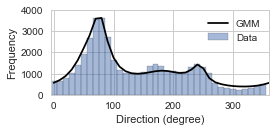

In [66]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [67]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.923502923321
Wall time: 11.6 s


## 6.3 Sectoral Comaprison

In [68]:
# %%time
# curve_collection = [direction_compare2(gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre)]

In [69]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [70]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

5.0 (-5.0 - 15.0) degree
data size: 1019 weight 0.023571593800601434
GMM Weibull
R square 0.646113897318 0.962250341564
max diff: 0.138651552376 0.0300659772164 speed value: 4.06839933681 9.4929317859 y gmm 0.279966567097
 


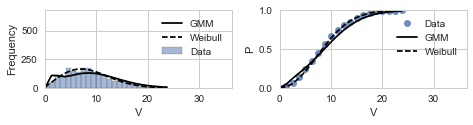

25.0 (15.0 - 35.0) degree
data size: 1841 weight 0.04258616701364793
GMM Weibull
R square 0.780216171037 0.955439387739
max diff: 0.0747771444961 0.0305660981191 speed value: 11.2674601247 5.00776005542 y gmm 0.674815468214
 


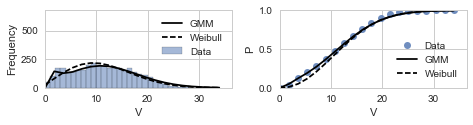

45.0 (35.0 - 55.0) degree
data size: 3369 weight 0.07793199167244969
GMM Weibull
R square 0.949536995082 0.880511891701
max diff: 0.0345923919597 0.083505396172 speed value: 21.4547752739 5.36369381848 y gmm 0.91702529875
 


65.0 (55.0 - 75.0) degree
data size: 6306 weight 0.1458709229701596
GMM Weibull
R square 0.940675386679 0.913128395817
max diff: 0.0555949901524 0.142999416561 speed value: 20.9238758116 9.51085264165 y gmm 0.850050426911
 


85.0 (75.0 - 95.0) degree
data size: 6397 weight 0.1479759426324312
GMM Weibull
R square 0.962657683363 0.908189017922
max diff: 0.0491474734847 0.0727840457258 speed value: 19.1680013807 4.79200034518 y gmm 0.881288668457
 


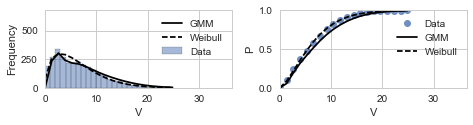

105.0 (95.0 - 115.0) degree
data size: 2834 weight 0.06555632662502892
GMM Weibull
R square 0.945967446677 0.968943542459
max diff: 0.0661840242794 0.0222102211333 speed value: 9.15906873958 2.61687678274 y gmm 0.68893241891
 


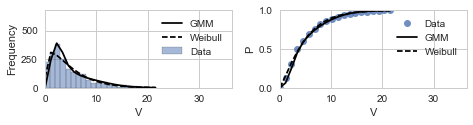

125.0 (115.0 - 135.0) degree
data size: 2048 weight 0.047374508443210735
GMM Weibull
R square 0.915494412809 0.928605474347
max diff: 0.0631926223062 0.0394290177758 speed value: 1.13391955105 3.40175865314 y gmm 0.0642487839438
 


145.0 (135.0 - 155.0) degree
data size: 2100 weight 0.048577376821651634
GMM Weibull
R square 0.938977314084 0.892600694971
max diff: 0.070001804713 0.0649037180974 speed value: 1.06744088295 4.26976353179 y gmm 0.0628553381442
 


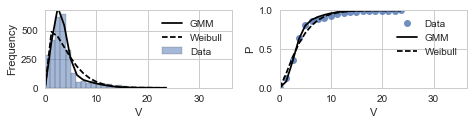

165.0 (155.0 - 175.0) degree
data size: 2817 weight 0.06516308119361554
GMM Weibull
R square 0.953885013557 0.818107244438
max diff: 0.0514139236792 0.100145163262 speed value: 1.24324242627 4.97296970507 y gmm 0.0813514295335
 


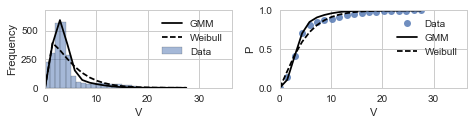

185.0 (175.0 - 195.0) degree
data size: 2497 weight 0.05776081424936387
GMM Weibull
R square 0.943323524294 0.729246108699
max diff: 0.070495512273 0.11538599437 speed value: 8.69849697443 4.34924848722 y gmm 0.941540766578
 


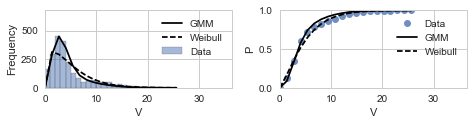

205.0 (195.0 - 215.0) degree
data size: 2208 weight 0.05107564191533657
GMM Weibull
R square 0.951899464906 0.821926283866
max diff: 0.0666665354021 0.0848226276184 speed value: 8.09236365552 4.04618182776 y gmm 0.885960013663
 


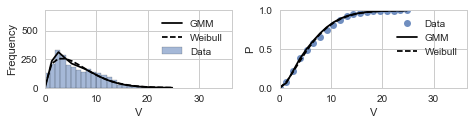

225.0 (215.0 - 235.0) degree
data size: 2429 weight 0.05618783252371039
GMM Weibull
R square 0.948495507866 0.914366827348
max diff: 0.040400549703 0.0341073816024 speed value: 7.83167873117 3.91583936558 y gmm 0.702813065141
 


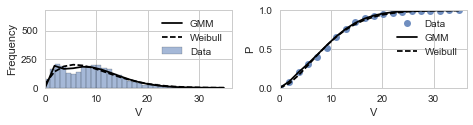

245.0 (235.0 - 255.0) degree
data size: 2769 weight 0.06405274115197779
GMM Weibull
R square 0.947620355043 0.870260396771
max diff: 0.0346073446779 0.0467576024507 speed value: 7.34362748423 3.67181374211 y gmm 0.43005696548
 


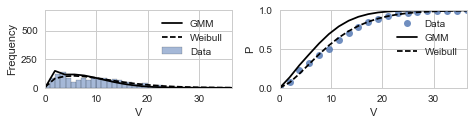

265.0 (255.0 - 275.0) degree
data size: 1565 weight 0.03620171177423086
GMM Weibull
R square 0.646353784687 0.845622375955
max diff: 0.188539056236 0.0485373591438 speed value: 9.58673347032 3.83469338813 y gmm 0.695248321412
 


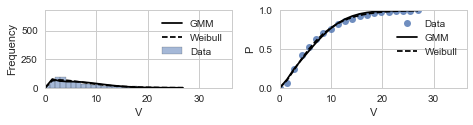

285.0 (275.0 - 295.0) degree
data size: 692 weight 0.016007402266944252
GMM Weibull
R square 0.797713446658 0.878763610308
max diff: 0.0572524129684 0.047318049227 speed value: 4.24768845531 4.24768845531 y gmm 0.363267818245
 


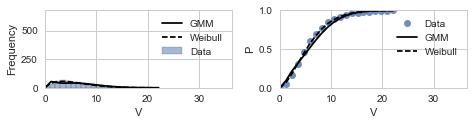

305.0 (295.0 - 315.0) degree
data size: 482 weight 0.011149664584779088
GMM Weibull
R square 0.778372168224 0.949091367408
max diff: 0.0848605289485 0.0328743092932 speed value: 5.83022926858 5.83022926858 y gmm 0.514724533292
 


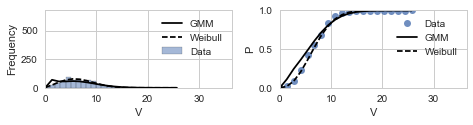

325.0 (315.0 - 335.0) degree
data size: 630 weight 0.01457321304649549
GMM Weibull
R square 0.695793746041 0.930246117571
max diff: 0.149960243462 0.0595894342913 speed value: 2.70657998835 5.41315997669 y gmm 0.243611037112
 


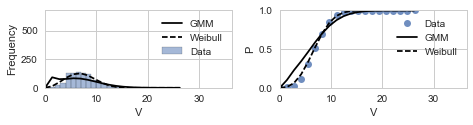

345.0 (335.0 - 355.0) degree
data size: 910 weight 0.021050196622715706
GMM Weibull
R square 0.57070450094 0.950970791918
max diff: 0.233248034416 0.0639678868453 speed value: 4.15016319477 4.15016319477 y gmm 0.342039243207
 
Wall time: 1min 9s


In [71]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [72]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.906021164474529 0.8903490025050249


0.06685142163838746 0.07470282902926835


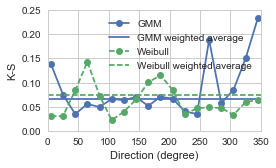

In [73]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

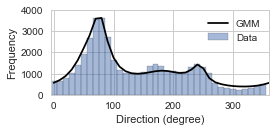

In [74]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [75]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [76]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [77]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


345.0 (335.0 - 355.0) Degree Speed Distribution
0.250181941545 4.0 0.329302820666


### 6.4.2 Time Variability

In [78]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


345.0 (335.0 - 355.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmcI3Wd//+qI3fS6fQ93dM9PScwAiuOiDDIyrErIKyr
OMghC4iirD4U3WUXWeWr4uLKrP7g4XKILgIuIuKyCoscy3AMlzAcwwzXHD0zPdNn0mfu1Pn7I/2p
qVRXkkpS6U46n+fj4UOmj0qlOvV51fv9eb9fb0ZVVRUUCoVCoVAKwi72CVAoFAqFUg9QwaRQKBQK
xQJUMCkUCoVCsQAVTAqFQqFQLEAFk0KhUCgUC1DBpFAoFArFAlQwKRQKhUKxABVMCoVCoVAsQAWT
QqFQKBQLUMGkUCgUCsUCVDApFAqFQrEAFUwKhUKhUCxABZNCoVAoFAtQwaRQKBQKxQJUMCkUCoVC
sQAVTAqFQqEsGIcOHcLXv/51nH/++fi7v/s7XHnlldizZw9+9rOf4aijjsL4+Lj2s5OTk/jABz6A
hx56CENDQzjiiCNw55135hzvK1/5Ci655JIFOXcqmBQKhUJZEFKpFK666ipcfvnl+N3vfod7770X
X/va1/CDH/wAANDf34/HHntM+/k//elPWLZsmfbvvr4+PPHEE9q/p6enMTg4uGDnzy/YK1EoFAql
Zrjmmmvw4IMP2nrMTZs2YfPmzXm//8wzz+CjH/0ojjvuOO1rxx57LO699178x3/8B84++2w8/vjj
uOyyy7SfP/XUU7WfDYVCaG5uxsDAAFavXo3HHnsMZ555Jl577TVb30c+aIRJoVAolAVhaGgIfX19
2r+vuuoqXHLJJTjzzDMxNjaGtrY2eDweHDp0CIODg+jq6oLL5co5xic/+Uk8+uijAIAtW7bgjDPO
WLDzpxEmhUKhNCCbN28uGA1Wg66uLrz99tvav2+//XYAwPnnnw9ZlgEcFkRJknDuuefixRdfzDnG
GWecgYsvvhif+cxn0N7eDrfbvWDnTyNMCoVCoSwIp59+Ol5++WVs375d+9rg4CDGxsbAMAwA4BOf
+AS2bNmC1157DSeccMK8Y/h8PqxcuRKbN2/GOeecs2DnDlDBpFAoFMoC4fP5cPvtt+Oee+7B5z//
eVxwwQW47rrr8O1vfxvd3d0AgEAggK6uLqxfvx4say5R5557Ll5//XWceOKJC3n6YFRVVRf0FSkU
CoVCqUNohEmhUCgUigWoYFIoFAqFYgFaJUtpSBRFgSRJEAQBHMeBZVlwHAeO47TiAwqFQtFDBZPS
UCiKgvHxcYRCIe3fqqpCVVUkEgnEYjF0d3eDZVkwDEOFlEKhaFDBpDQEiqJAlmUoioLR0VE0Nzfn
CCD5byKgpCeM1MQxDKMJKBVSCqUxoYJJWdKQ1KvVYnDjz+nF0KqQ8jyv/ZtCoSwdaNEPZUkiyzIE
QYAgCKYiaCagpQgcEUrgsJBKkoRMJqOlduPxOJLJJFKpFDKZDGRZtizcFMpS5NJLL8WOHTsAAIIg
YMOGDfjlL3+pff+SSy7Be++9N+/3tm7digceeABDQ0M4//zzLb/exo0bteMODAxUePZUMClLDCKU
oihCVVVTESwkmJUKGhFScqxiQioIAhVSSsOwceNGzSj99ddfx8knn4znnnsOAJDJZDA8PIwjjzxy
3u+dcsop+NznPreg52oGFUzKksCKUBL0wrhQadN8QppOpxGPxzUhTaVSSKfTVEgpC0J///z/ffvb
5X+/GCeddJImmM899xw2bdqEWCyGWCyGN998Ex/5yEewbds2XHjhhfj85z+Pb3/72xBFEQ899BD+
/d//HQAwNTWFr3zlK9i0aRNuvfVWAMC1116LrVu3AshGo9dee225l6QgdA+TUtfIsqwV8+jTpOVg
R4RZzmvqU7uSJGn/TYSftL0wDANZluFyuWixEaUuWb9+Pfbt2wdVVbFt2zZ861vfwoknnoiXXnoJ
u3btwsknn4zvfve7+M1vfoPW1lbcfPPN+J//+R/w/GGpSiaT2Lx5M7xeLy6++GKcfvrpC3b+VDAp
dYeqqjlVr6UK5WIIY6no35OiKFAUBQCwd+9e9Pf3a4VFxmKjSh8aKI3FgQPV/b4RlmVx5JFHYuvW
rWhvb4fT6cQpp5yCZ599Fu+//z4uvvhifPe738XVV18NAEin0zjppJOwYsUK7RhHHnkkAoEAAOCY
Y47B/v37c16jmvc2FUxK3VCpUBKquYe5EJgJqT7FrBdS0vqSz8SaQlloNm7ciJ///Of45Cc/CQDY
sGEDbrvtNgDZAdFdXV247bbbEAgEsGXLFni9XoyOjmq/PzAwgEQiAZfLhR07duBzn/scXn75ZUQi
EQDAu+++W7Vzp4JJqXmIUJL2ELuiqKUUienfi15IBUHQvm8UUhKRUigLyUknnYTvfOc7uOmmmwAA
TqcTgUAARx11FFiWxb/8y7/gyiuvhKqq8Pl8uOmmm3IEMxgM4pvf/CampqZw9tlnY82aNdi0aROu
u+46PPLII+i3splaJnRaCaVmUVUVqVQKs7OzCIVCti3ue/bsQW9vL9xutyYoQLZKb3R0tKo3XKXs
3bsXK1euBMdxFR0nX0TK8zzdH6VQ8kAjTErNQapIZVlGOp3G9PQ0WlpabDt+vaReq0kpESl1NaJQ
slDBpNQMeqEkqVeWZasibvW8h1lNzIRUf01IOpfaA1IaESqYlEXHTCjJAlwNEdO3cYiiSPfyimC8
NkZ7QAA5aV1RFOF2u+FwOOh1pSwpqGBSFo1CQkmoVtQXjUYxNDSkFRI5nU44HA7IsqxV4NHIqTD5
fHYPHDiA7u5uuFwualhPWVJQwaQsOFaEkmCnYKqqipmZGaTTaSiKgu7ubjidTs0lKJlMIpFIYGpq
CplMBgDgcrngdDpz/r/Sgpuljt5piU5+oSwlqGBSFgy9JRyAgkJJsEMwiVBGIhHwPA+Xy4XOzk74
/X6IogiO4+DxeOBwODAzM4Pe3l7tXAVBQCaTQTqdRjQahSAIYBgGLpdrnpjSXsfD5PPwJZgJKQBT
MwY6+YVSK1DBpFQdYjZAFsiFcuUhQhkOh+F0OtHd3Q2/348DFuxJSIsFz/Pwer05xyRm6iQqnZmZ
gSAI4Hl+XjTqdDobbrEv5uVrpJCQkkg/nxlDo11byuJCBZNSNfSuPKUuooRyBNMolMuXL4fP5yt6
TCuvxTAMHA4HHA7HvNcURVET0ng8jqmpKYiiCIfDMU9IaUFMcfIJqd5gX9/6QlK7VEgp1YIKJsV2
zISy3AWsFMFUVRXT09OIRCKmQllNGIaB0+mE0+nM+bqiKJqQZjIZRKNRbTamWTS6FCp2y304sorZ
LFKyH64XUmP7CxVSSqVQwaTYhizLiEQiaG5uBmBtj7IYVgRTURRtj9KKUC6klyzLstp+p/GcSTSa
yWSQTCaRyWS0il0zIaUUptDkF/J9EokC2c+r1+ulhvUUy9C7kFIx+ohyeHgYwWDQ9gIYs6ilVKEk
1IJBAcuy8Hg88Hg8OV+XZTlHSOPxODKZjBbBKoqCaDQKt9sNp9NZkxW71Y4wS8XMjEGWZezfvx+r
V6/Oa1hPhZRihAompWz0Qkmw25lHP3RZP6WDCKXL5UJvb29OYY4VatXph+M4eL1e00IjQRAwMjKS
U7HLcdy8aJRW7BbHOO2GGtZTrEAFk1Iy+skhRqrlzEMmlkxPT2NiYqJsoSTHK0QtRkik0IhhGHR0
dIDjOK3QiESjpIeUuBeZCelCvK9au35mFDrHUie/UMP6xoEKJsUypLiCPJ2bwTBMTsRpF1NTU5ic
nITb7S5bKAmF9jDrCX2hkd/v176uqioEQdCElESjkiTB4XDM6yG1M2pa7AjdKqqqlhyFU8N6ChVM
SlGMQlloAbA

### 6.4.3 Adjacent Sector Variability

In [79]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [80]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


345.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUXGWdPv7ce2vt6n3f0kknhE0IRAYIhh+KOMZBOXrm
KxkNZsARF87MIDAjIsjouI6ACAePjMZRxuAYwjIjKMuMKMsIoyASZAkknaSTTrpr7+pa7/77o/u9
eev2vVW3qm5Vb+9zDod0ddf7vnd7n/vZng+n67oOBgYGBgYGhpLgF3oBDAwMDAwMSwGMMBkYGBgY
GByAESYDAwMDA4MDMMJkYGBgYGBwAEaYDAwMDAwMDsAIk4GBgYGBwQEYYTIwMDAwMDgAI0wGBgYG
BgYHYITJwMDAwMDgAIwwGRgYGBgYHIARJgMDAwMDgwMwwmRgYGBgYHAARpgMDAwMDAwOwAiTgYGB
gYHBARhhMjAwMDAwOAAjTAYGBgaGhuHIkSO4+uqrsXXrVvz1X/81PvWpT2Hfvn246667cMoppyAc
Dht/G4/H8ba3vQ0PPfQQJiYmcNJJJ+EHP/hB0Xif+cxnsH379oasnREmAwMDA0NDkM/ncdVVV+Hj
H/84du/ejZ/85Cf4u7/7O3zlK18BAKxZswaPPfaY8fePPvooBgYGjJ9HRkbwxBNPGD8nk0mMj483
bP2ehs3EwMDAwLBo8LnPfQ7333+/q2NeeumluPXWW21//5vf/AabNm3Cxo0bjc82bNiAn/zkJ/ju
d7+Liy++GI8//jiuuOIK4+8vvPBC4287OjrQ3t6OsbExrFu3Do899hje97734cUXX3T1OOzALEwG
BgYGhoZgYmICIyMjxs9XXXUVtm/fjve9732YmppCd3c3gsEgjhw5gvHxcfT398Pv9xeN8f73vx+/
/OUvAQBPPvkk3vOe9zRs/czCZGBgYFiBuPXWW0tag/VAf38/Xn31VePnu+++GwCwdetWqKoK4Dgh
KoqCSy65BL/97W+LxnjPe96Dyy67DH/5l3+Jnp4eBAKBhq2fWZgMDAwMDA3BRRddhOeffx4vv/yy
8dn4+DimpqbAcRwAYMuWLXjyySfx4osv4txzz503RigUwujoKG699VZ84AMfaNjaAUaYDAwMDAwN
QigUwt13341///d/x8c+9jF85CMfwY033ogvfOELGBwcBAC0tLSgv78fp556KnjemqIuueQS/OEP
f8B5553XyOWD03Vdb+iMDAwMDAwMSxDMwmRgYGBgYHAARpgMDAwMDAwOwLJkGVYkNE2DoiiQJAmC
IIDneQiCAEEQjOQDBgYGBhqMMBlWFDRNQzgcRkdHh/GzruvQdR3ZbBbpdBqDg4PgeR4cxzEiZWBg
MMAIk2FFQNM0qKoKTdMwOTmJ9vZ2aJoGWZbh9XoNMiQESmrCSE4cx3EGgTIiZWBYmWCEybCsQVyv
dDK4ruuIRqNIJBLgOA6qqsLn84HneSiKgmw2C5/PB4/HU0SGTonU4/EYPzMwMCwfsKQfhmUJVVUh
SRIkSTLITVEUoxOCJEkYHR3F6Ogo1q5di97eXvj9fui6jmQyicOHD2NsbAyHDx/G1NQUkskkstms
Qb6EKIHjRKooCkRRNFy7mUwGuVwO+XweoihCVVWwKi6GlYzLL78cr7zyCoDZZ/Css87CD3/4Q+P3
27dvxxtvvDHve8888wzuu+8+TExMYOvWrY7n27x5szHu2NhYjatnFibDMoOqqobrlZCaoiiIxWJI
JpNobW0Fz/MYGBiAIAhG0k8wGISu6xBFEcPDw8ZYoihCkiSIoohMJmMQsN/vh8/ng8/nM/5dziIV
RRGKoiCZTGJgYAAcxxluXWaRMqwEbN68GS+++CI2bNiAP/zhDzj//PPx9NNP48orr4Qoijh69ChO
Pvnked+74IILAMxq0S4kGGEyLAtYEaUsy4jFYpienkZbWxvWrVsHn8+HdDpd5FK1gyAIaGpqQlNT
U9HnJLuWkGkmk4EoiuA4rohAyb/pOCdJLiJEKsuyYbGSuCj9b0akDPXEmjXzP/voR4FvfrO63x86
VHq+d7zjHfje976Hv/mbv8HTTz+NSy+9FLfddhvS6TRee+01nHPOOXjhhRfwne98B4IgYNWqVfjK
V76CRx55BAcOHMBHPvIRJBIJfOYzn0E8Hse73vUu/O3f/i1uuOEGXHzxxbjgggvwzDPP4NFHH8W/
/Mu/VHYyHIARJsOShhVRSpKEWCyGVCqF9vZ2nHDCCfB6vWXH4jjOkcvU4/HA4/EUESmxJgmJFgoF
zMzMQJIkcBxnkKggCEYCEiFHmkwVRTH+TYiUJk5GpAxLGaeeeioOHDgAXdfxwgsv4LrrrsN5552H
5557Dm+++SbOP/983HzzzfiP//gPdHV14Y477sB//ud/wuM5TlW5XA633normpqacNlll+Giiy5q
2PoZYTIsOei6XpT1ShNlNBrFzMwMOjo6sH79+qIHjcApMVYCjuMMIg2FQkVrJbFNSZKQz+ehaRoO
HDgAQRCKLFLyf0KGdOaupmnGeGQ+nufnJRvR32NgKIdyFmGtvzeD53mcfPLJeOaZZ9DT0wOfz4cL
LrgATz31FPbu3YvLLrsMN998M6655hoAQKFQwDve8Q6sXr3aGOPkk09GS0sLAOD000/HwYMHi+ao
Z54AI0yGJQM7ohRFEdFoFOl0Gp2dnbZESWBHmPUiUq/Xa1i4kiTh6NGjWLNmDWRZNhKTcrkcpqen
IUkSPB7PvPgoTaQEpYg0m80iGAwiEAgYFikDw2LA5s2b8f3vfx/vf//7AQBnnXUWvve97wGYbRDd
39+P733ve2hpacGTTz6JpqYmTE5OGt8fGxtDNpuF3+/HK6+8gr/6q7/C888/j2g0CgB4/fXX67Z2
RpgMix6EKBOJBKanpzEyMmIQZSQSQSaTcUSUZiyEJUZImcQ7fT5f0e91XYcsy0XxUUmSIMsyPB7P
PGvU5/PNsyo1TUM8HkdHR4etRSoIwrwkJQaGRuAd73gHvvjFL+KWW24BAPh8PrS0tOCUU04Bz/O4
6aab8KlPfQq6riMUCuGWW24pIsy2tjZce+21SCQSuPjii3HCCSfg0ksvxY033ohHHnkEa6wCry6B
dSthWLQgcUFSjpHJZBCPx9Hf349oNIpMJoOuri50dXVBEATH4+7btw+rVq1CIBCAJEnG56IoYnJy
sq4PnCzLOHLkCNauXVvR93RdN6xROnNXURR4vd55rt1wOIzOzs4i97B5PGA+kXo8HibGwMBgA2Zh
Miw6mImSjlHm83kcOnQIXV1dGBwcrIgoCerheq03SOKQ3+834jcADLUiQqIk0UiWZYTDYQSDwSIy
JapGdq5d8gJBEylTNWJgmAUjTIZFAzuizOVyiEajyOVy4Hke69evrzkm16gYZr3B87xBpDSOHDmC
5uZm8DwPSZKM+ChRNTKXvlglDBEipc8JceeSvyWuZUakDCsBjDAZFhyliDISiaBQKKCnpwddXV0I
h8M1k+VCb+6NImWfzzfPJUsrIImiiFwuB1EUoWmaZXzUKs5JakhVVcXY2JjxAsN0dhmWOxhhMiwY
7Igym80iEolAkiT09PRgZGQEPM8jn8+7QjaNzJK1mqNRsJqLqBoFg8GizwmRmpONdF23LH0xW5lM
sJ5hJYARJkPDYUWUAJDJZBCJRKAoCnp6etDe3l60sbpFaPQ4S9ENWw/YEWkpVSOv1wtd1zE9PW2p
agQ4F6xnRMqwFMAIk6FhoEXKgeMWUDqdRiQSgaqq6O3tRVtbm+3GWU9yY+Q5H6VUjfL5PKampmxV
jawsUvMY5N8EVmIMTNWIYbGAESZD3aGqKpLJJJqbmwEcJ6aZmRlEo1Fomobe3l60traW3BjrYWEy
VA5SftLU1AS

# 7. Result Variability & Cross-Validation

In [81]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.7 square_error


## 7.1 Variability of the Result

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.565   2.904  5.527  6.145  8.950  0.398
2  0.220  -1.524  0.388  1.715  1.481  0.193
3  0.215  -0.770  2.871  3.470  8.423  0.831

GMM Plot Result
0.565276414299 [[ 2.90389406  5.52679393]] [ 5.33833597  9.45333149] 157.032086783
0.219666040355 [[-1.52385966  0.38758285]] [ 1.39693942  1.78431791] -63.675666043
0.215057545346 [[-0.76969742  2.87053445]] [ 1.82159225  8.92530862] 160.247434211


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.027      0.090  3.874319e-08      0.012       0.338

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.026      0.085  3.687594e-08      0.011       0.329

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.571   3.119  5.841  6.078  9.043  0.405
2  0.222  -1.499  0.424  1.748  1.533  0.194
3  0.207  -1.010  2.251  3.428  8.683  0.830

GMM Plot Result
0.570958481915 [[ 3.11949279  5.84064795]] [ 5.26985874  9.53668004] 157.605506429
0.222385085371 [[-1.49889609  0.42350558]] [ 1.44067517  1.824953  ] -62.0679165189
0.206656432714 [[-1.00959737  2.25134722]] [ 1.81252969  9.15746151] 161.082630479


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.029      0.100  3.837382e-08      0.012       0.336

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.030      0.096  3.679090e-08      0.011       0.329

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.566   2.972  5.483  6.146  8.860  0.400
2  0.222  -1.469  0.381  1.744  1.529  0.216
3  0.212  -0.709  2.961  3.489  8.781  0.836

GMM Plot Result
0.566224284957 [[ 2.97235604  5.48329755]] [ 5.32222971  9.37825415] 156.548204539
0.221997588228 [[-1.46876879  0.38103783]] [ 1.41985022  1.83442662] -60.734641012
0.211778126815 [[-0.70869957  2.96091919]] [ 1.81137684  9.2740916 ] 160.858772743


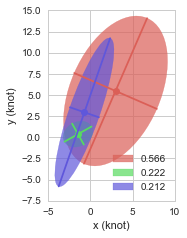

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.026      0.123  4.196036e-08      0.012       0.351

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.027      0.086  3.715004e-08      0.011       0.330

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.565   2.908  5.548  6.118  8.842  0.368
2  0.222  -1.568  0.417  1.750  1.509  0.175
3  0.214  -0.814  2.218  3.421  8.679  0.843

GMM Plot Result
0.564573302746 [[ 2.90771373  5.54756578]] [ 5.41346576  9.29041968] 157.814653153
0.221866196889 [[-1.56834654  0.41665769]] [ 1.43649276  1.81029625] -65.22816215
0.213560500365 [[-0.81399108  2.21844359]] [ 1.74225268  9.16486722] 160.89754261


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.025      0.089  3.827534e-08      0.012       0.336

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.024      0.084  3.692761e-08      0.011       0.329

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.563   2.994  5.529  5.997  8.742  0.368
2  0.219  -1.495  0.416  1.713  1.505  0.200
3  0.217  -0.937  2.539  3.554  8.766  0.834

GMM Plot Result
0.563329770759 [[ 2.99407931  5.52868897]] [ 5.31489529  9.17279818] 158.194280653
0.219224369599 [[-1.4949635   0.41646824]] [ 1.4086824   1.79317964] -61.5325761519
0.217445859642 [[-0.93744877  2.53904631]] [ 1.85119427  9.27622813] 160.500956039


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.025      0.104  3.695581e-08      0.011       0.329

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.025      0.096  3.661501e-08      0.011       0.328

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.557   2.936  5.316  6.126  8.840  0.390
2  0.224  -1.519  0.397  1.772  1.531  0.223
3  0.219  -0.713  3.182  3.537  8.922  0.838

GMM Plot Result
0.556729832951 [[ 2.93644665  5.31599794]] [ 5.34227242  9.33517351] 156.93790875
0.224349781583 [[-1.51946395  0.39680878]] [ 1.42081982  1.86156876] -61.7132831539
0.218920385466 [[-0.71346604  3.1815503 ]] [ 1.82710916  9.42190041] 160.870773033


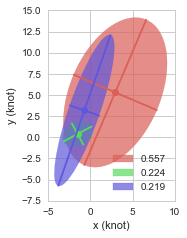

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.024      0.084  3.768967e-08      0.012       0.333

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.024      0.086  3.668830e-08      0.011       0.328

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.556   2.987  5.538  6.089  8.698  0.370
2  0.224  -1.501  0.412  1.750  1.499  0.184
3  0.219  -0.884  2.591  3.685  9.221  0.843

GMM Plot Result
0.556498655899 [[ 2.98723887  5.53789638]] [ 5.37327355  9.15741736] 157.286132269
0.224003696834 [[-1.50101124  0.41247452]] [ 1.42166581  1.81322359] -65.0934155592
0.219497647267 [[-0.88397096  2.59058931]] [ 1.87703577  9.75063996] 160.644302562


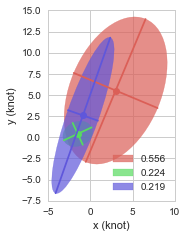

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.025      0.104  3.717328e-08      0.011       0.331

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.025      0.088  3.659293e-08      0.011       0.328

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.563   2.971  5.297  6.188  8.855  0.390
2  0.220  -0.654  3.319  3.667  8.985  0.839
3  0.217  -1.537  0.397  1.740  1.503  0.184

GMM Plot Result
0.562622635031 [[ 2.97089864  5.29695275]] [ 5.38738465  9.36333969] 156.575378435
0.219923616565 [[-0.65430877  3.31930097]] [ 1.88068589  9.52043937] 160.284113071
0.217453748404 [[-1.53701204  0.39691366]] [ 1.4235924   1.80520341] -64.2444606259


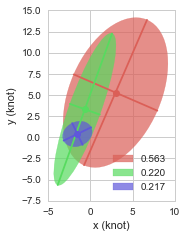

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.026      0.124  3.902430e-08      0.012       0.339

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.029      0.082  3.679095e-08      0.011       0.329

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.562   2.853  5.409  6.109  8.761  0.394
2  0.220  -0.649  3.173  3.709  9.099  0.845
3  0.218  -1.498  0.367  1.731  1.491  0.199

GMM Plot Result
0.561673741609 [[ 2.85250227  5.40906406]] [ 5.30826863  9.26785046] 156.551562577
0.220401561657 [[-0.64895332  3.17348287]] [ 1.87246777  9.64600389] 160.221741426
0.217924696734 [[-1.49847526  0.36725886]] [ 1.40195774  1.80393927] -63.5075687213


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.026      0.090  3.685442e-08      0.011       0.329

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.029      0.086  3.674761e-08      0.011       0.329

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.561   3.085  5.543  6.196  8.749  0.394
2  0.221  -0.832  2.804  3.704  9.080  0.834
3  0.218  -1.476  0.390  1.717  1.504  0.216

GMM Plot Result
0.560917710951 [[ 3.0852496   5.54252354]] [ 5.36927254  9.27880436] 155.890900217
0.220742681338 [[-0.83171554  2.80385495]] [ 1.93103513  9.61448828] 160.389077346
0.218339607711 [[-1.47603355  0.39002375]] [ 1.39691997  1.80560913] -60.8434414765


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.027      0.093  3.837350e-08      0.012       0.336

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.030      0.085  3.688057e-08      0.011       0.329


Wall time: 29.4 s


In [82]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [83]:
# df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn%400 == 0)')

In [84]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32422.5 10807.5
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    7.866844  0.097165  8.176599e-07    0.053899     1.550880  0.591664
1    0.534005  0.097293  8.124281e-07    0.054160     1.544848  0.591576
2    6.844086  0.098915  8.316459e-07    0.053993     1.563284  0.585967
3    5.325245  0.099087  8.238175e-07    0.053425     1.556460  0.585145

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.672391  0.089469  8.240570e-07    0.053498     1.554817  0.584634
1   58.042943  0.103395  8.494592e-07    0.053056     1.581860  0.580222
2    0.532557  0.098438  7.992239e-07    0.053766     1.533574  0.593537
3    0.635003  0.101158  8.352861e-07    0.055964     1.566124  0.589292

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.172587  0.023983  5.471487e-08    0.013959     0.400841  0.972558
1    1.931786  0.024567  5.749267e-08    0.014313     0.411319  0.970979
2    1.751332  0.024365  5.881484e-08    0.014355     0.415613  0.970598
3    2.222590  0.025161  5.759506e-08    0.014205     0.411653  0.971353

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   13.957084  0.021788  7.004598e-08    0.015545     0.454474  0.965135
1    0.218726  0.028846  6.392731e-08    0.014836     0.432814  0.968803
2    0.189562  0.022151  5.625754e-08    0.014275     0.407221  0.971704
3    0.318859  0.032211  6.205575e-08    0.014993     0.426533  0.968335

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.098430  0.026602  3.475518e-08    0.011134     0.319641  0.982560
1    0.092058  0.026341  3.761868e-08    0.011553     0.332473  0.981263
2    0.092607  0.026777  3.707300e-08    0.011377     0.330015  0.981350
3    0.078796  0.026631  3.726038e-08    0.011461     0.331121  0.981350

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.097442  0.028340  4.903916e-08    0.012976     0.379654  0.975638
1    0.104634  0.021076  4.257192e-08    0.012185     0.353977  0.978386
2    0.117161  0.031016  4.508065e-08    0.012847     0.364380  0.977791
3    0.197083  0.033244  4.052950e-08    0.012003     0.344645  0.979703

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0  948.255849  0.022821  2.366145e-08    0.009032     0.263747  0.988207
1    0.183240  0.025996  2.682781e-08    0.009838     0.280960  0.986462
2    0.201610  0.026939  2.932067e-08    0.010172     0.293545  0.985257
3    0.087220  0.022874  2.157695e-08    0.008751     0.251747  0.989260

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0  1416.796443  0.027660  3.172971e-08    0.010990     0.305357  0.983907
1     0.084625  0.030048  4.114103e-08    0.011691     0.347264  0.979895
2     0.079999  0.026340  3.304392e-08    0.010822     0.311787  0.983681
3     0.223012  0.020918  2.976429e-08    0.010182     0.296153  0.984849

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.896443  0.011745  2.645150e-08    0.009761     0.278853  0.986626
1    1.117322  0.011926  2.720504e-08    0.009686     0.282579  0.986552
2    1.236975  0.012396  2.734087e-08    0.009830     0.283636  0.986392
3    0.075329  0.028285  1.458804e-08    0.007195     0.207136  0.992618

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.137229  0.016872  3.370601e-08    0.010604     0.314761  0.983614
1    0.094188  0.012950  3.447600e-08    0.011452     0.319074  0.982082
2    0.129240  0.015905  3.067209e-08    0.010403     0.299836  0.984372
3    0.360701  0.029822  2.325403e-08    0.009003     0.261250  0.988740

Wall time: 1min 22s


In [85]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    5.142545  0.098115  8.213879e-07    0.053869     1.553868  0.588588
2    1.519574  0.024519  5.715436e-08    0.014208     0.409856  0.971372
3    0.090473  0.026588  3.667681e-08    0.011381     0.328313  0.981631
4  237.181980  0.024658  2.534672e-08    0.009448     0.272500  0.987297
5    0.831517  0.016088  2.389636e-08    0.009118     0.263051  0.988047

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1   14.970724  0.098115  8.270065e-07    0.054071     1.559094  0.586921
2    3.671058  0.026249  6.307164e-08    0.014912     0.430261  0.968494
3    0.129080  0.028419  4.430531e-08    0.012503     0.360664  0.977880
4  354.296020  0.026242  3.391974e-08    0.010921     0.315140  0.983083
5    0.180339  0.018887  3.052703e-08    0.010366     0.298730  0.984702

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


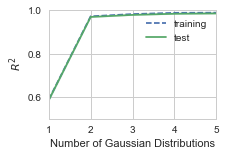

K_S


Chi_square


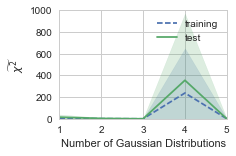

In [86]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

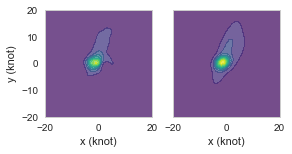

In [87]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

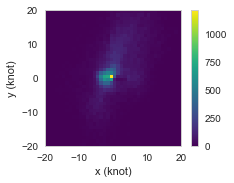

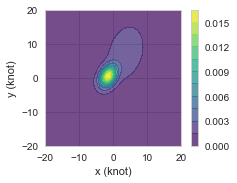

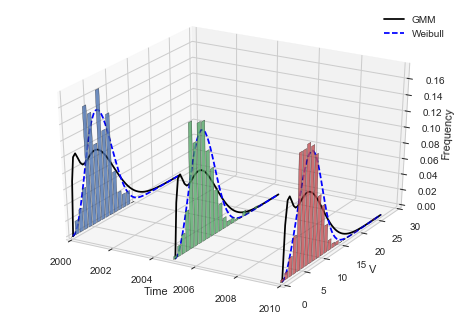

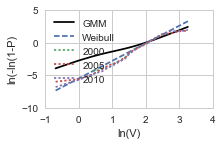

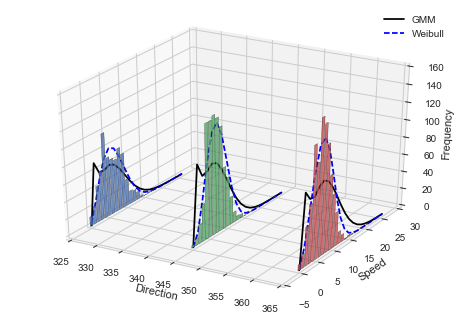

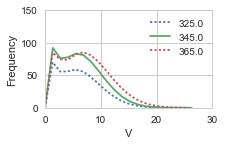

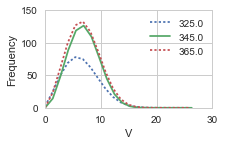

In [88]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [89]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

eleftherios_intl
